# 1.Carga de librerías y preparación de datos

##1.1 Instalo paquetes que voy a usar 

In [ ]:
install.packages("tidyverse")
install.packages("tidymodels")#Modelos
install.packages("modelr")
install.packages("GGally")#Libreria para ploteo de correlaciones
install.packages("pROC") #Curva ROC
install.packages("cowplot")
install.packages("OneR")
install.packages("rlang")
install.packages("caret")
install.packages("lubridate")
install.packages("openintro") 
install.packages("corrr")#Para generar Matriz de correlación
install.packages("ggplot2")
install.packages("lattice")           
install.packages("gridExtra") #Para plotear multiples gráficos de ggplot
install.packages("ggthemes")
install.packages("scales")
install.packages("viridis")
install.packages("glmnet") #sirve para regularización de Lasso

#install.packages("knitr") no la necesitamos
#install.packages("kableExtra") #Formatear tablas
#install.packages("robustbase")#Para el modelo robusto
#install.packages("yardstick")#Para las métricas 
#install.packages("formattable") #dar formato a las tablas

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

##1.2 Llamo a las librerías que voy a usar

In [ ]:
#Librerias a utilizar
library(modelr)
library(tidyverse)
library(lubridate)
library(openintro)
library(GGally)#Libreria para ploteo de correlaciones 
library(corrr)#Para generar Matriz de correlación
library(tidymodels)#Modelos
library(ggplot2)             
library(gridExtra) #Para plotear multiples gráficos de ggplot
library(ggthemes)
library(scales)
library(viridis)
library(glmnet) #Modelo Lasso
library(pROC)
library(cowplot)
library(OneR)
library(rlang)
library(caret)

#library(formattable) #dar formato a las tablas
#library(knitr)
#library(kableExtra)
#library(lattice)  
#library(robustbase)#Para el modelo robusto
#library(yardstick)#Para las métricas en modelo lineal

In [ ]:
#Defino un theme para todas las figuras
daltonic_colors <- c("#f07e1f","#f8ae3d","#f3d156","#bbe2ff","#7fc3ff","#3f9aff","#1478c9","#0e4e7b")


theme_tp<-theme(
          plot.title = element_text(color="red", size=14, face="bold"),
          plot.subtitle = element_text(color="black", size=12, face="bold"),
          axis.title.x = element_text(color="black", size=12, face="bold"),
          axis.title.y = element_text(color="black", size=12, face="bold"))+
          theme(legend.title = element_text(color = "black", size = 10, face="bold"),       
                legend.text = element_text(color = "black",face="italic"))
 

##1.3 Cargo la base de datos

In [ ]:
#Levanto la base de datos
df<-read.csv2("/content/Base_datos_dias_muerte_completo.csv")

In [ ]:
#Elimino la primera columna, que creo que es el ID del paciente de la tabla anterior
df<-df[,-1]

#Le cambio los nombres así queda más amigable y entendible

columnas<-c("Indice_de_masa_corporal",
            "Altura",
            "Peso",
            "Años_como_fumador",
            "Edad_del_diagnóstico_en_dias", #Desde la fecha que se hace el diagnóstico.
            "Sobrevida_en_dias", #Desde la fecha que se hace el diagnóstico
            "Grupo_cultural",
            "Genero",
            "Características_morfologicas", #black, white, etc..
            "Año_de_nacimiento",
            "Año_de_muerte",
            "Dias_desde_el_último_chequeo",
            "Diangóstico_Primario",
            "Porcentaje_de_Linfocitos_dentro_del_tumor",
            "Porcentaje_de_tejido_necrótico",
            "Porcentaje_de_Neutrófilos_dentro_del_tumor",
            "Porcentaje_de_pureza_de_la_muestra_obtenida",
            "Alteracion_en_el_gen_p53")


colnames(df)<-columnas

#Transformo en variables numéricas

df$Edad_del_diagnóstico_en_dias<-as.numeric(df$Edad_del_diagnóstico_en_dias)
df$Edad_del_diagnóstico_en_dias<-as.numeric(-df$Edad_del_diagnóstico_en_dias) #Le saco el menos que aparecia delante

#glimpse(df)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”



##1.4 Generación de variables a priori y variable objetivo

In [ ]:
#Variable objetivo

df$Sobrevida_en_años<- (round(df$Sobrevida_en_dias/365)) 
df$Sobrevida<-df$Sobrevida_en_años
  
for(i in 1:nrow(df)) {
  if (df[i, 'Sobrevida_en_años'] > 1) {
      df[i, 'Sobrevida'] =1 
  } else{df[i, 'Sobrevida'] =0}
}

#Generación de variables a-priori - Variables que a priori podrían resultar importantes


#Edad en la cual fue diagnosticado

df$Edad_diagnostico_años<-(round(df$Edad_del_diagnóstico_en_dias/365))

#Cambio en p53 el 1 por 'si' y el 0 por 'no' para mejor interpretación de resultados

for(i in 1:nrow(df)) {
  if (df[i, 'Alteracion_en_el_gen_p53'] == 1) {
      df[i, 'Alteracion_en_el_gen_p53'] ='SI'
  } else{df[i, 'Alteracion_en_el_gen_p53'] ='NO'}
}

In [ ]:
#Estudio la distribución de los valores faltantes

df %>% 
  summarise_all(~sum(is.na(.)))

Indice_de_masa_corporal,Altura,Peso,Años_como_fumador,Edad_del_diagnóstico_en_dias,Sobrevida_en_dias,Grupo_cultural,Genero,Características_morfologicas,Año_de_nacimiento,⋯,Dias_desde_el_último_chequeo,Diangóstico_Primario,Porcentaje_de_Linfocitos_dentro_del_tumor,Porcentaje_de_tejido_necrótico,Porcentaje_de_Neutrófilos_dentro_del_tumor,Porcentaje_de_pureza_de_la_muestra_obtenida,Alteracion_en_el_gen_p53,Sobrevida_en_años,Sobrevida,Edad_diagnostico_años
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
13246,13230,13024,15156,122,0,0,0,0,96,⋯,9048,0,11308,7274,11558,7428,0,0,0,122


Necesito imputar los missing values para poder correr los análisis

In [ ]:
#0 puede ser un valor significativo para los porcentajes, por eso pongo la media
df$Porcentaje_de_Linfocitos_dentro_del_tumor[is.na(df$Porcentaje_de_Linfocitos_dentro_del_tumor)] <- mean(df$Porcentaje_de_Linfocitos_dentro_del_tumor, na.rm = T)  
df$Porcentaje_de_pureza_de_la_muestra_obtenida[is.na(df$Porcentaje_de_pureza_de_la_muestra_obtenida)] <- mean(df$Porcentaje_de_pureza_de_la_muestra_obtenida, na.rm = T)  
df$`Porcentaje_de_Neutrófilos_dentro_del_tumor`[is.na(df$`Porcentaje_de_Neutrófilos_dentro_del_tumor`)] <- mean(df$`Porcentaje_de_Neutrófilos_dentro_del_tumor`, na.rm = T)  
df$`Años_como_fumador`[is.na(df$`Años_como_fumador`)] <- mean(df$`Años_como_fumador`, na.rm = T) 

#Inputo el resto de valores faltantes con 0, el 0 no tendría significado.

df[is.na(df)] <- 0



In [ ]:
df %>% 
  summarise_all(~sum(is.na(.)))

Indice_de_masa_corporal,Altura,Peso,Años_como_fumador,Edad_del_diagnóstico_en_dias,Sobrevida_en_dias,Grupo_cultural,Genero,Características_morfologicas,Año_de_nacimiento,⋯,Dias_desde_el_último_chequeo,Diangóstico_Primario,Porcentaje_de_Linfocitos_dentro_del_tumor,Porcentaje_de_tejido_necrótico,Porcentaje_de_Neutrófilos_dentro_del_tumor,Porcentaje_de_pureza_de_la_muestra_obtenida,Alteracion_en_el_gen_p53,Sobrevida_en_años,Sobrevida,Edad_diagnostico_años
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


##1.5 Separo base de datos entre train y test

In [ ]:
#Separar la base entre train y test -> necesitariamos la base más amplia para que tenga peso la separacion de la info. Más info mejor.

#Semilla
set.seed(1)

#Elimino el id que viene por defecto y creo uno para mi base de datos
df <- mutate(df, `...1` = NULL) 
df$id <- 1:nrow(df)

#Usar 70% del dataset como training y 30% como test 
train <- df %>% dplyr::sample_frac(0.7) #sample_frac(0.70)
test  <- dplyr::anti_join(df, train, by = 'id')

##1.6 Analizo balanceo de clase de variable objetivo

In [ ]:
#Veo como me quedo balanceada o no nuestra clase a predecir (ACÁ USO EL CODIGO DE LAS CLASES)
# armamos tabla conjunta para graficar


# calculamos la distribución de clase en cada dataset
train_1 <- train %>% 
  group_by(Sobrevida) %>% 
  summarise(numero_casos=n()) %>%
  mutate(prop = round(prop.table(numero_casos)*100,2))

test_1 <- test %>% 
  group_by(Sobrevida) %>% 
  summarise(numero_casos=n()) %>%
  mutate(prop = round(prop.table(numero_casos)*100,2)) #Agrgega nuva col

# armamos tabla conjunta para graficar
distrib = cbind(rbind(train_1, test_1), dataset = c("train", "train", "test", "test"))
distrib



Sobrevida,numero_casos,prop,dataset
<dbl>,<int>,<dbl>,<chr>
0,5706,49.28,train
1,5872,50.72,train
0,2416,48.69,test
1,2546,51.31,test


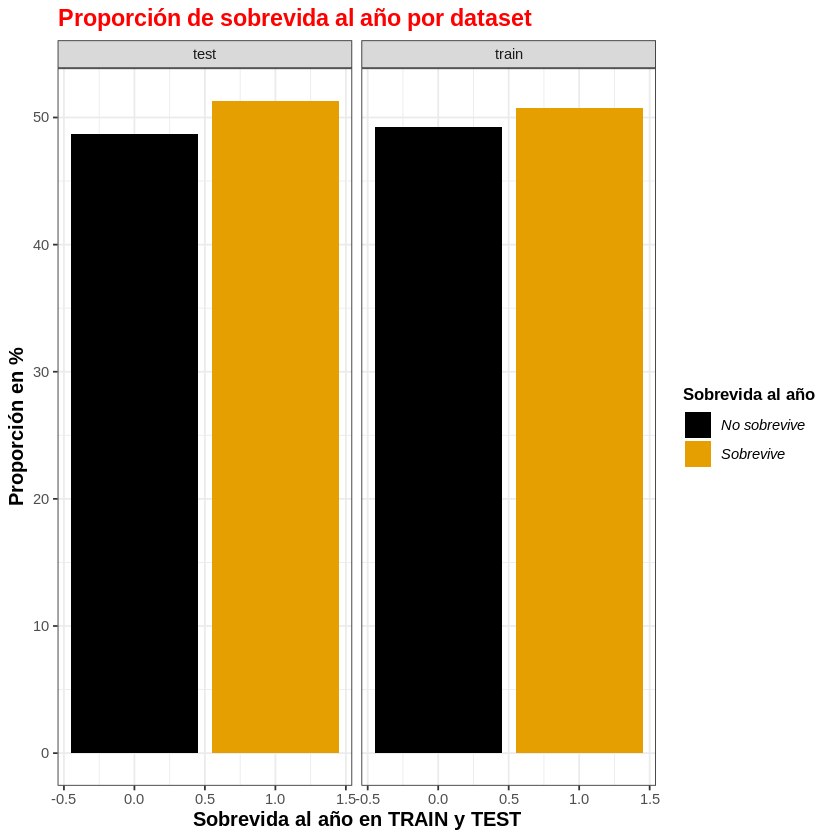

In [ ]:
# graficamos las distribuciones
ggplot(distrib, aes(x = Sobrevida, y = prop, fill = factor(Sobrevida), label = prop)) + 
         geom_bar(stat="identity", position = "dodge") + facet_wrap(~ dataset) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = "Sobrevida al año en TRAIN y TEST", y = "Proporción en %", title = "Proporción de sobrevida al año por dataset") + 
  guides(fill=guide_legend(title="Sobrevida al año"))+
  theme_bw() +
  theme_tp+
  scale_fill_colorblind(labels=c('No sobrevive','Sobrevive'))



#2. Introducción




##2.1 Objetivo

**Objetivo:** Predecir si una persona va a estar viva en un período de tiempo igual a un año a partir de su diagnóstico.

**Hipótesis:**


* Podemos modelar la probabilidad de sobrevida a partir de los datos clínicos, fisiológicos y genéticos.

* Vamos a estudiar la alteración en un gen (p53) que se encuentra alterado en la mayoría de los tumores.

* Vamos a utilizar un modelo de regresión logística



##2.2 Descripción variables incluidas en el dataset


**Numericas**

* Indice de Masa Corporal
* Altura
* Peso
* Años como fumador 
* Edad cuando es diagnoticado
* Porcentaje de Linfocitos dentro del tumor
* Porcentaje de tejido necrótico
* Porcentaje de Neutrófilos dentro del tumor
* Pureza de la muestra obtenida


**Categóricas**
* Grupo cultural
* Género
* Características morfologicas
* Alteracion en el gen p53 (1=Si;0=No)
* Diangóstico Primario


**Explicación de algunas variables:**


* **Grupo cultural**: En los Estados Unidos, además de clasificar por **"características morfologicas"** *("raza")*, clasifican a los pacientes de acuerdo a su ascendencia cultural como hispanos y latinos, o no hispanos ni latinos.

* **Características morfologicas**: Sería el equivalente a lo que se denomina *race* en los Estados Unidos. En particular se presentan las siguiente cateogrías: *american indian or alaska native, asian, black or african american, native hawaiian or other pacific islander, not reported, white*. 

**Variables clinicas**

* **Diangóstico Primario:** El primer diagnótico tumoral que recibe el paciente. 

* **Indice de Masa Corporal**: Es el peso de una persona en kilogramos dividido por el cuadrado de la estatura en metros. Por consiguiente, se espera que correlacione con la altura y el peso de la persona.

**Variable molecular**

* **Alteracion en el gen p53 (1=Si;0=No)**:Gen que da origen a una proteína que se encuentra en el núcleo de las células y cumple una función importante en el control de la división y destrucción de las células(www.cancer.gov). En muchos caso esta proteína es la encargada de evitar que una células que se transforme en tumoral continué desarrollándose. 

**Variables relacionadas con el sistema inmune**

* **Porcentaje de Linfocitos dentro del tumor:** Porcentaje de linfocitos (que son una céluluas que pertenecientes al sistema inmune). En general, mientras más de estas células hay presentes en el tumor, mejor es el pronóstico (aunque depende del tipo de linfocito presente y efecto de este sobre el tumor).

* **Porcentaje de tejido necrótico:** Porcentaje de tejido necrotico o muerto (es una medida de la cantidad de tejido y células muertas presentes). Si el sistema inmune logra combatir eficazmente el tumor, probablmemente se observe un aumento en el porcentaje de tejido necrótico. También sería indicador de un buen pronóstico (en general).


* **Porcentaje de Neutrófilos dentro del tumor:** Son otras células, que se denominan neutrófilos. Pasa lo mismo que con los linfocitos. Mientras más ingresan al tumor, suele ser mejor el pronótico. 


* **Porcentaje de pureza de la muestra obtenida**:Es obtenido mediante la proporción de células "estromales". Estas células son normales. Nos habla de la pureza de la muestra. Si hay pocas células estromales, quiere decir que hay muchas células tumorales y la muestra que se obtuvo es mejor. No debería haber relación con los otros porcentajes. Se espera en general que esta variable no sea muy pura (que tenga valores bajos).


**A priori:**

Las variables que puden estar relaciones es **Porcentaje de Neutrófilos dentro del tumor:** y **Porcentaje de Linfocitos dentro del tumor** con **Porcentaje de tejido necrótico**. Más probable que haya una relación entre Porcentaje de tejido necrótico y Porcentaje de Neutrófilos dentro del tumor.







# 3.Análisis Descriptivo

##3.1 Análisis de variables númericas

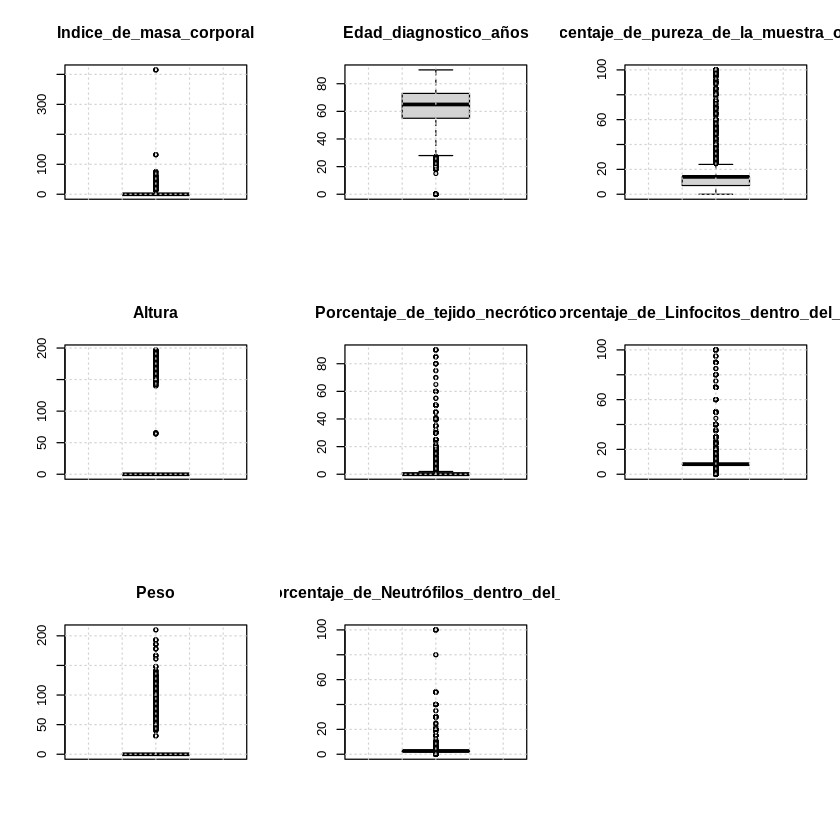

In [ ]:
#Vector de nombres de variables númericas 
vn_txt <- c("Indice_de_masa_corporal",
            "Altura",
            "Peso",
            #"Años_como_fumador",#Descartada
            "Edad_diagnostico_años",
            "Porcentaje_de_tejido_necrótico",
            "Porcentaje_de_Neutrófilos_dentro_del_tumor",
            "Porcentaje_de_pureza_de_la_muestra_obtenida",
            "Porcentaje_de_Linfocitos_dentro_del_tumor")

#Genero el gráfico de Boxplot para cada una de las variables númericas
par(mfcol = c(3,3))
    for (k in seq(1,length(vn_txt))){
      boxplot(train[,vn_txt[k]], main = vn_txt[k])+
      theme_tp
      grid()
    }

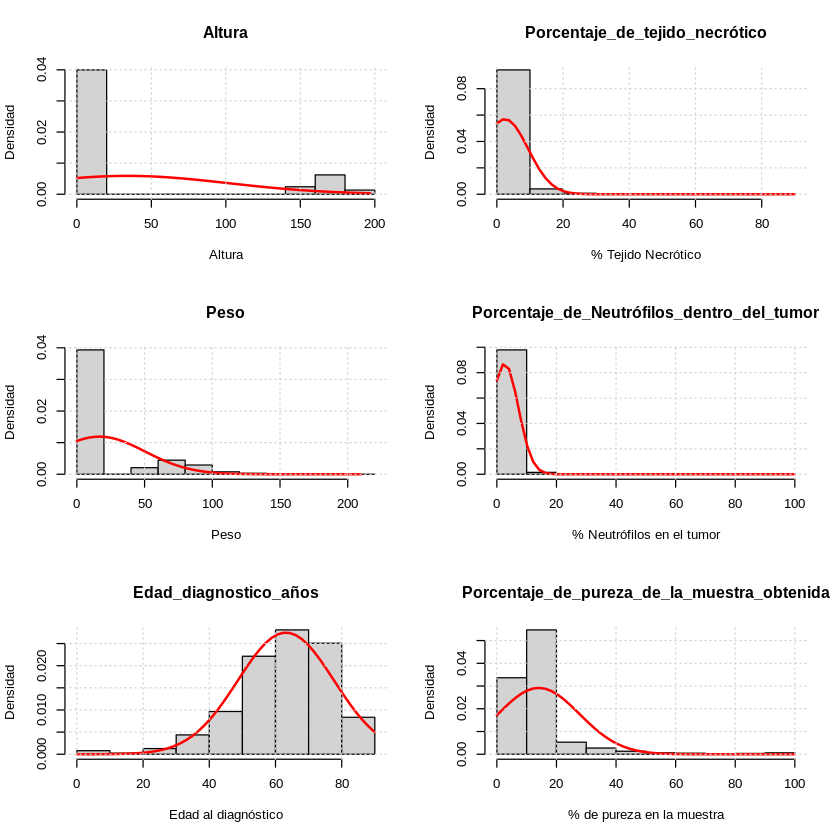

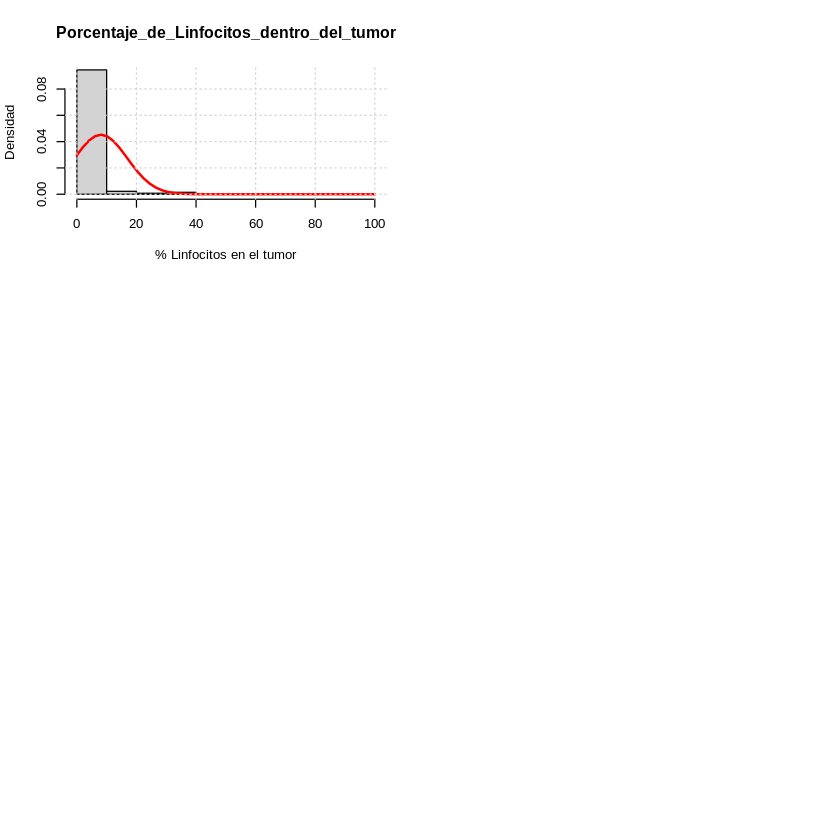

In [ ]:
#train <-  data.frame(train) #Le doy formato de tabla a train para facilicitar el manejo de los datos.
y <- c("BMI",
            "Altura",
            "Peso",
            #"Años de fumador", Descartada
            "Edad al diagnóstico",
            "% Tejido Necrótico",
            "% Neutrófilos en el tumor",
            "% de pureza en la muestra", "% Linfocitos en el tumor")

#
#Genero el gráfico de histograma para cada una de las variables númericas:
par(mfcol = c(3,2))
    for (k in seq(2,length(vn_txt))){#Empiezo desde 2 porque no voy a ver BMI
      hist(train[,vn_txt[k]],prob = TRUE, ylab = "Densidad" ,xlab = y[k], main = vn_txt[k],10)
      x0 <- seq(min(train[, vn_txt[k]], na.rm = TRUE), max(train[, vn_txt[k]], na.rm = TRUE), le = 50) 
      lines(x0, dnorm(x0, mean(train[,vn_txt[k]],na.rm = TRUE), sd(train[,vn_txt[k]],na.rm = TRUE)), col = "red", lwd = 2) 
      grid()
    }



### Correlación entre las variables numericas

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


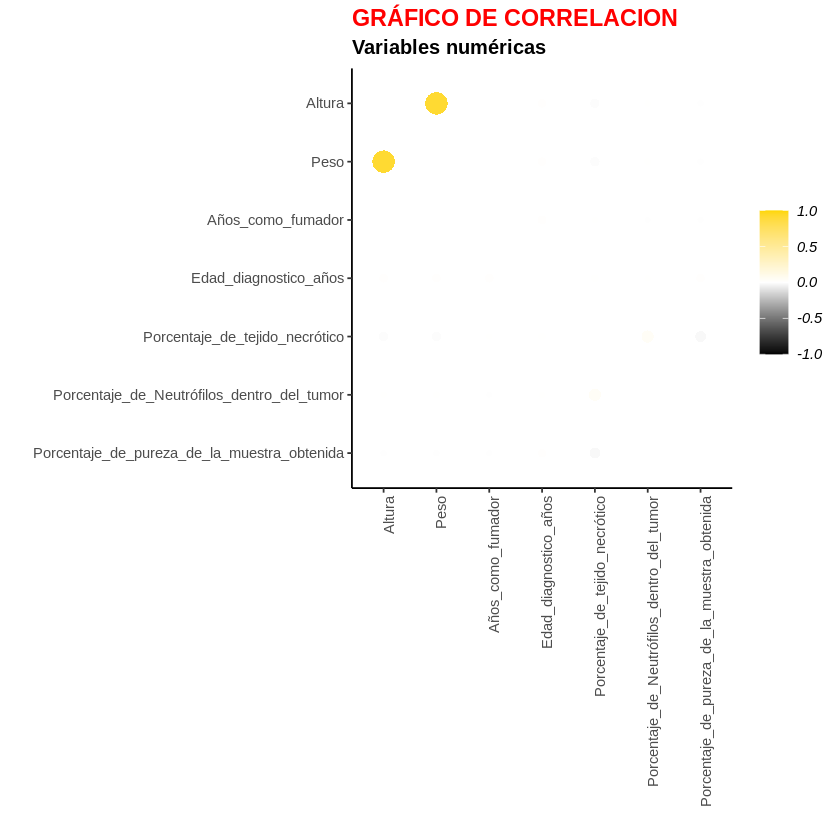

In [ ]:
#Vuelvo a definir las variables numericas para estudiar la correlación. 
#Acá sí necesito sí o sí sacar BMI

vn_txt <- c("Altura",
            "Peso",
            "Años_como_fumador",
            "Edad_diagnostico_años",
            "Porcentaje_de_tejido_necrótico",
            "Porcentaje_de_Neutrófilos_dentro_del_tumor",
            "Porcentaje_de_pureza_de_la_muestra_obtenida")

a<-train %>%  #Te saca automáticamente aquellas que categoricas (sino le pongo nada más)
    select(all_of(vn_txt))%>% 
    correlate() %>% 
    rplot(colours=c("black","white","gold"))+
    theme_tp+
    labs(title = "GRÁFICO DE CORRELACION",
       subtitle = "Variables numéricas")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
  
suppressWarnings(a)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


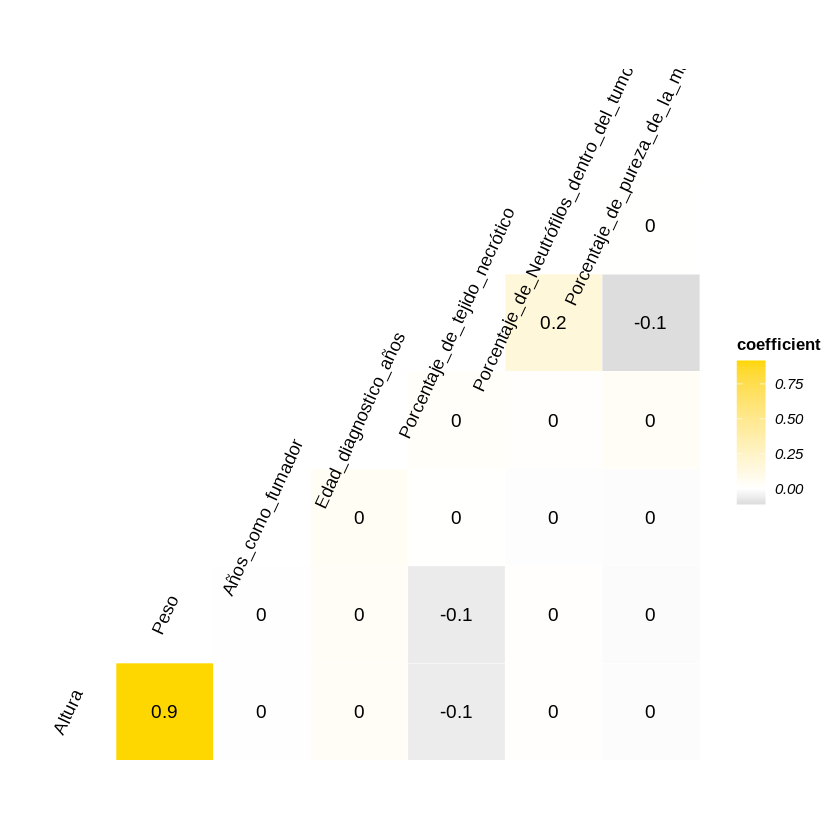

In [ ]:
#Me encanta el gráfico Eli
#Valores numéricos correlaciones

train_n <- train[,vn_txt]
ggcorr(train_n,label = TRUE,angle = 65)+
   scale_fill_gradient2(low="black",high="gold")+
   theme_tp
  

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


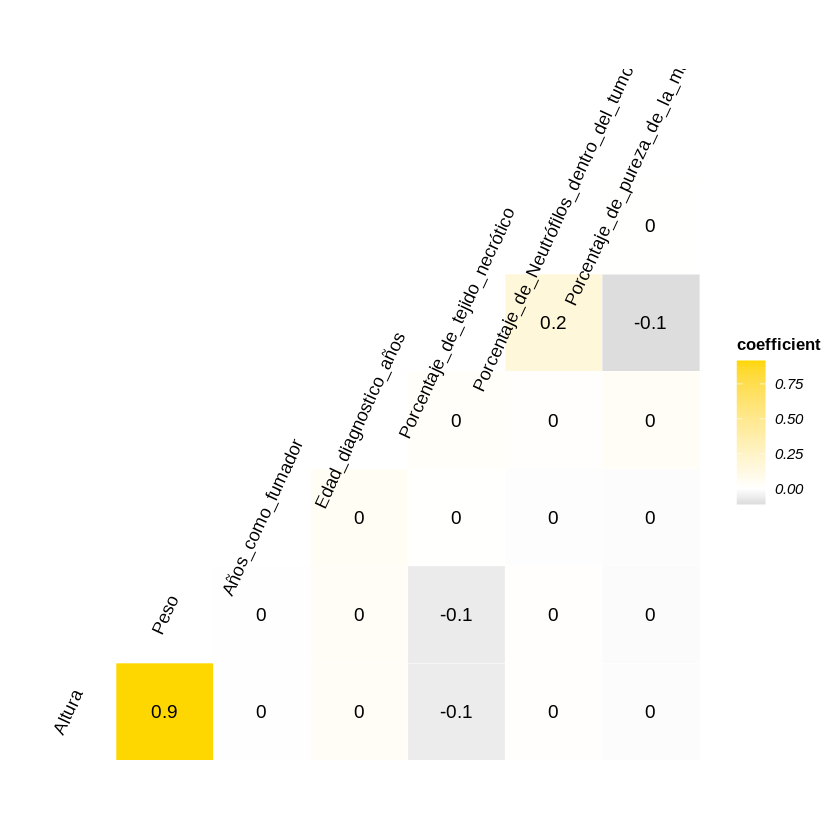

In [ ]:
#Vector de nombres de variables númericas 
vn_txt_2 <- c("Edad_diagnostico_años",
            "Porcentaje_de_tejido_necrótico",
            "Porcentaje_de_Neutrófilos_dentro_del_tumor",
            "Porcentaje_de_pureza_de_la_muestra_obtenida")

train_n2 <- train[,vn_txt_2]
ggcorr(train_n,label = TRUE,angle = 65)+
   scale_fill_gradient2(low="black",high="gold")+
   theme_tp
  



El alto porcentaje de NA está influyendo en el analisis de correlación entre años como fumador y altura dado que ambos cuentan con un gran porcentaje de NA. Por lo tanto, no vamos a considerar esta relación. Los datos no son erroneos pero son escasos para sacar conclusiones. Sin embargo, si se observa una correlación positiva entre edad de diagnostico y años como fumador que sí podemos considerar dado que la variable "edad diagnostico en años", tiene menos del 1% NA en sus datos.  

##3.1 Análisis de variables categóricas

In [ ]:
vc_txt<-c('Grupo_cultural',
          'Género',
          'Características_morfologicas',
          'Alteracion_en_el_gen_p53',
          'Diangóstico_Primario')

In [ ]:
g1<-ggplot(train,aes(x=train$Grupo_cultural, fill=train$Grupo_cultural))+
    geom_bar()+
    theme_tp+
    labs(y= "Cantidad de registros", x = "Grupo cultural")+
    guides(fill=guide_legend(title="Grupo Cultural"))+ #Cambio titulo de la leyenda
    scale_fill_colorblind()  

g2<-ggplot(train,aes(x=train$Genero, fill=train$Genero))+
    geom_bar()+
    theme_tp+
    labs(y= "Cantidad de registros", x = "Género")+
    guides(fill=guide_legend(title="Género"))+ #Cambio titulo de la leyenda
    scale_fill_colorblind() 

g3<-ggplot(train,aes(x=train$Características_morfologicas, fill=train$Características_morfologicas))+
    geom_bar()+
    theme_tp+
    labs(y= "Cantidad de registros", x = "Características morfologicas")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    guides(fill=FALSE)+ #Saco la leyenda  #Cambio titulo de la leyenda
    scale_fill_colorblind() 

g4<-ggplot(train,aes(x=train$Alteracion_en_el_gen_p53, fill=train$Alteracion_en_el_gen_p53))+
    geom_bar()+
    theme_tp+
    labs(y= "Cantidad de registros", x = "Alteracion en el gen p53")+
    guides(fill=FALSE)+ #Saco la leyenda  
    scale_fill_colorblind() 

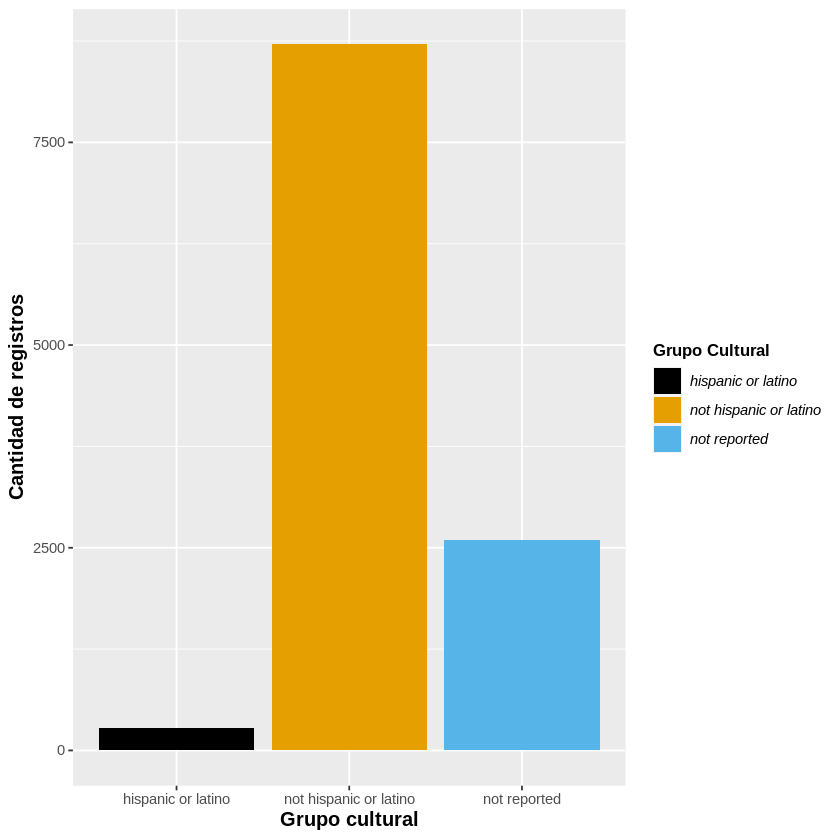

In [ ]:
suppressWarnings(grid.arrange(g1,ncol=1,nrow=1))

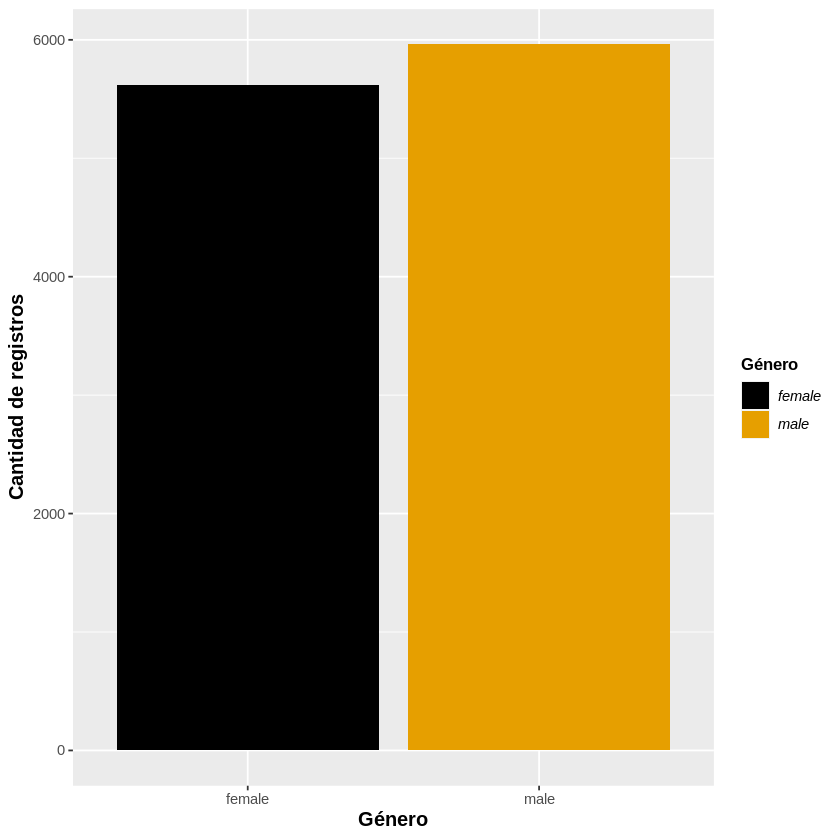

In [ ]:
suppressWarnings(grid.arrange(g2,ncol=1,nrow=1))

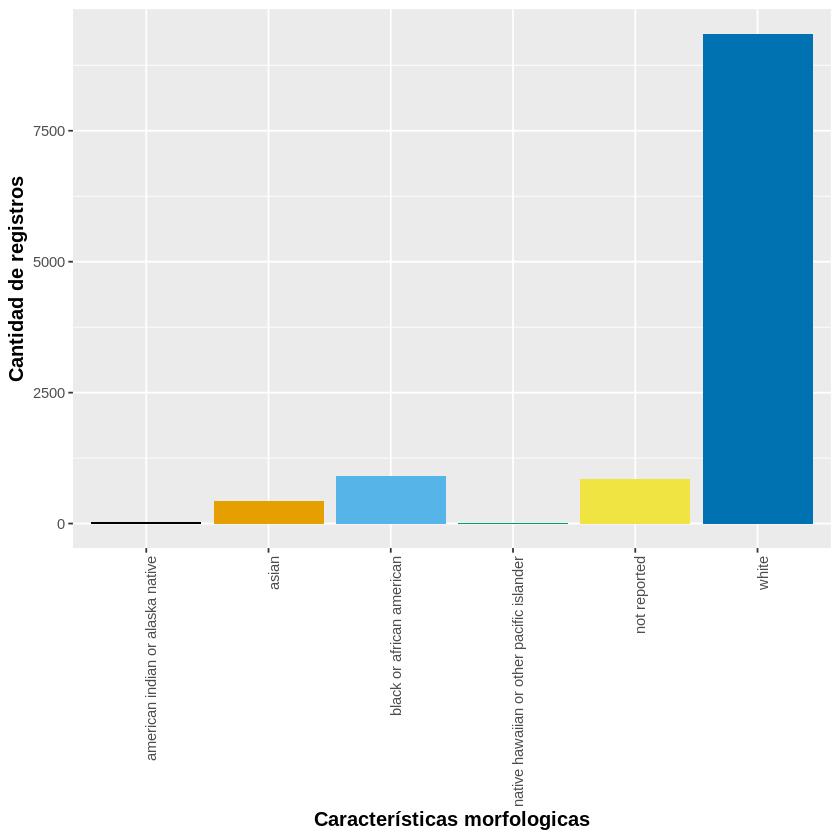

In [ ]:
suppressWarnings(grid.arrange(g3,ncol=1,nrow=1))

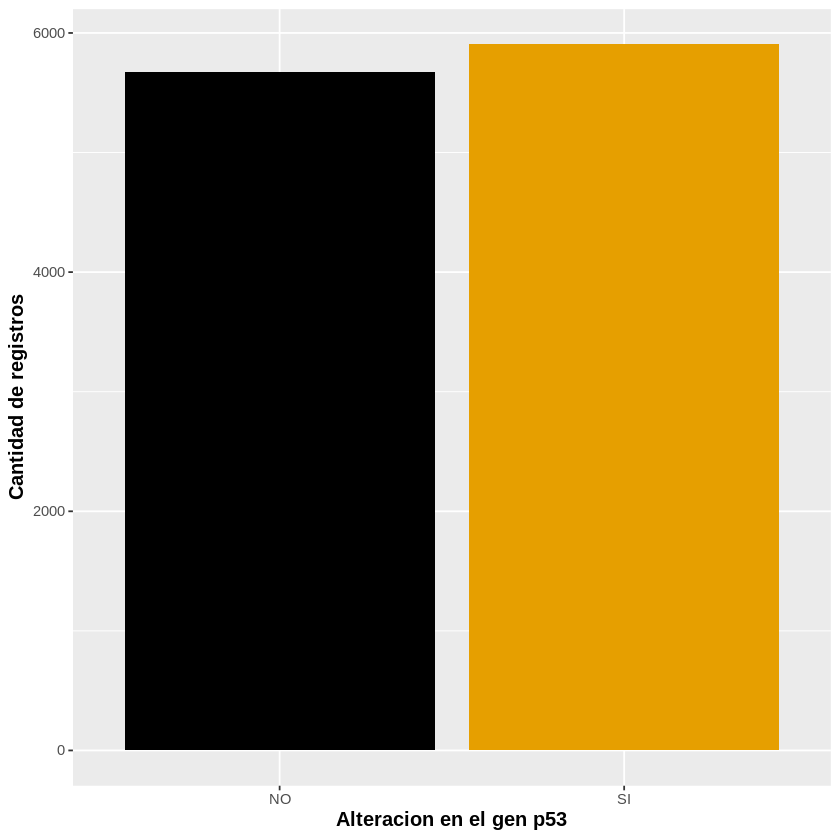

In [ ]:
suppressWarnings(grid.arrange(g4,ncol=1,nrow=1))
#suppressWarnings(grid.arrange(g5,ncol=1,nrow=1))

In [ ]:
#HAY MUCHOS TIPOS DE DIAGNÓSTICOS PRIMARIOS
#El gráfico no se puede mostrar, queda muy apretado. Lo dejo como tabla 
#Que es mucho más visible

train %>% 
  group_by(Diangóstico_Primario) %>% 
  summarise(numero_casos=n()) %>%
  mutate(prop = round(prop.table(numero_casos)*100,2))%>%
  arrange(prop)





Diangóstico_Primario,numero_casos,prop
<chr>,<int>,<dbl>
"Desmoplastic melanoma, malignant",2,0.02
Mesodermal mixed tumor,2,0.02
Superficial spreading melanoma,2,0.02
Adenocarcinoma with neuroendocrine differentiation,4,0.03
"Bronchio-alveolar carcinoma, mucinous",4,0.03
"Carcinoma, NOS",4,0.03
Combined hepatocellular carcinoma and cholangiocarcinoma,4,0.03
"Cribriform carcinoma, NOS",4,0.03
"Embryonal carcinoma, NOS",3,0.03


## 3.2 GGpairs por Variable Objetivo

In [ ]:
vn_seleccion<-c("Edad_diagnostico_años", 
               "Porcentaje_de_Linfocitos_dentro_del_tumor",
               "Porcentaje_de_tejido_necrótico",
               "Porcentaje_de_Neutrófilos_dentro_del_tumor",
               "Porcentaje_de_pureza_de_la_muestra_obtenida")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


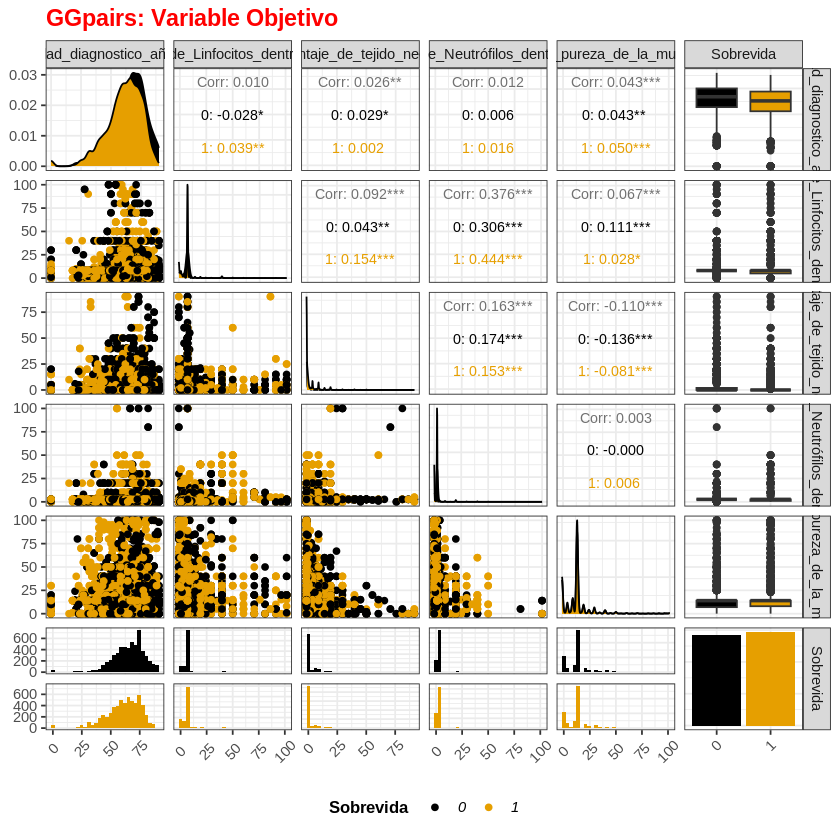

In [ ]:
 train %>% 
  select(vn_seleccion,Sobrevida) %>% # 
  mutate(Sobrevida = factor(Sobrevida)) %>%  #Quiero que el factor sea por genero
  ggpairs(., mapping = aes(colour = Sobrevida), title = "GGpairs: Variable Objetivo",
          upper = list(continuous = wrap("cor", size = 3, hjust=0.5)), 
          legend = 25) + 
  theme_bw()+
  theme_tp+
  theme(axis.text.x = element_text(angle=45, vjust=0.5),
        legend.position = "bottom")+
   scale_fill_colorblind()+
   scale_colour_colorblind()
 

Hacer comentarios, si ves gluna extraña. Me parece estan todos mas o menos iguales

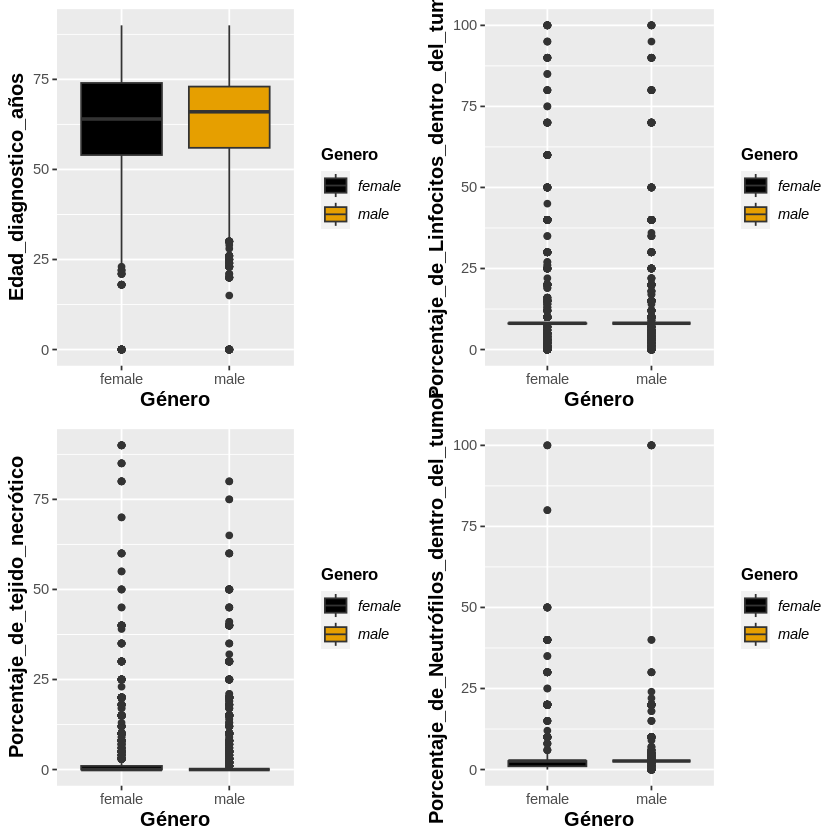

In [ ]:
a<-ggplot(train, aes(x=Genero, y=train$`Edad_diagnostico_años`, fill=Genero))+
   geom_boxplot()+
   theme_tp+
   labs(y= "Edad_diagnostico_años", x = "Género")+ #altura
   scale_fill_colorblind()
 
b<-ggplot(train, aes(x=Genero, y=train$Porcentaje_de_Linfocitos_dentro_del_tumor, fill=Genero))+ 
   geom_boxplot()+
   theme_tp+
   labs(y= "Porcentaje_de_Linfocitos_dentro_del_tumor", x = "Género")+ #Peso
   scale_fill_colorblind()
 
c<-ggplot(train, aes(x=Genero, y=train$Porcentaje_de_tejido_necrótic, fill=Genero))+
   geom_boxplot()+
   theme_tp+
   labs(y= "Porcentaje_de_tejido_necrótico", x = "Género")+ #Edad_diagnostico_años
   scale_fill_colorblind()
 
d<-ggplot(train, aes(x=Genero, y=train$Porcentaje_de_Neutrófilos_dentro_del_tumor, fill=Genero))+
   geom_boxplot()+
   theme_tp+
   labs(y= "Porcentaje_de_Neutrófilos_dentro_del_tumor", x = "Género")+
   scale_fill_colorblind()
 

#"Porcentaje_de_pureza_de_la_muestra_obtenida"

suppressWarnings(grid.arrange(a,b,c,d,ncol=2,nrow=2)) #Esta funcion saco los warnings. Es buenisima
 
 


No se observan grandes diferencias, únicamente en la distribución de la Altura. 

Por otra parte, a partir del GGPAirs, la unica variable que parecía indicir en cuanto a la correlación (aunque era prácticamente nula) para la variable relacionada con la a predecir (muerte a partir del diagnóstico) era "Porcentaje de tejido necrótico". Hacemos un dotplot para analizar en detalle la situación

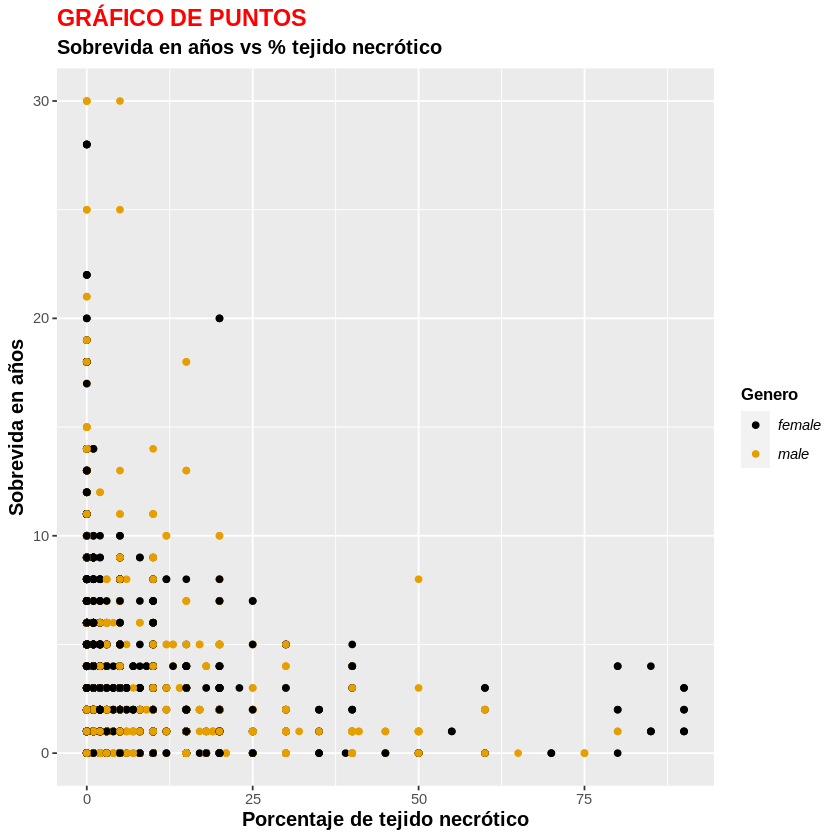

In [ ]:

e<-ggplot(train, aes(y=train$Sobrevida_en_años, x=train$Porcentaje_de_tejido_necrótico, colour=Genero))+
   geom_point()+
   theme_tp+
  labs(title = "GRÁFICO DE PUNTOS",
       subtitle = "Sobrevida en años vs % tejido necrótico")+
   labs(y= "Sobrevida en años", x = "Porcentaje de tejido necrótico")+
   scale_colour_colorblind()

suppressWarnings(grid.arrange(e,ncol=1,nrow=1))


## 3.3 GGpairs por alteración en el gen p53

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


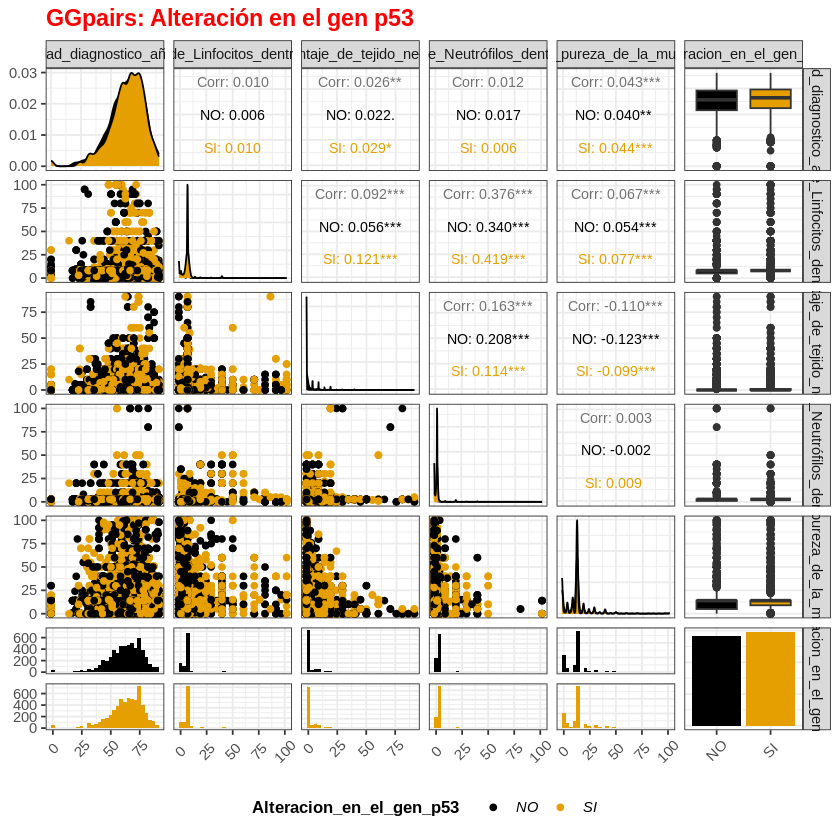

In [ ]:
 train %>% 
  select(vn_seleccion,Alteracion_en_el_gen_p53) %>% # 
  mutate(Alteracion_en_el_gen_p53 = factor(Alteracion_en_el_gen_p53)) %>%  #Quiero que el factor sea por genero
  ggpairs(., mapping = aes(colour = Alteracion_en_el_gen_p53), title = "GGpairs: Alteración en el gen p53",
          upper = list(continuous = wrap("cor", size = 3, hjust=0.5)), 
          legend = 25) + 
  theme_bw()+
  theme_tp+
  theme(axis.text.x = element_text(angle=45, vjust=0.5),
        legend.position = "bottom")+
   scale_fill_colorblind()+
   scale_colour_colorblind()

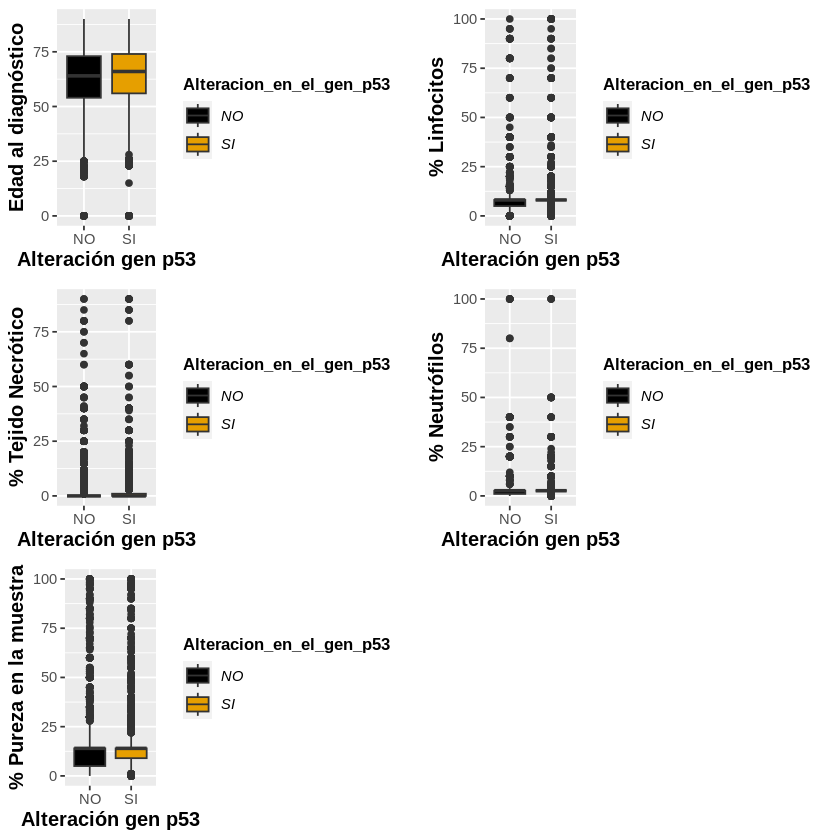

In [ ]:
#Miramos algunas de las variables más en detalle

a<-ggplot(train, aes(x=Alteracion_en_el_gen_p53, y=train$`Edad_diagnostico_años`, fill=Alteracion_en_el_gen_p53))+
   geom_boxplot()+
   theme_tp+
   labs(y= "Edad al diagnóstico", x = "Alteración gen p53")+ #altura
   scale_fill_colorblind()
 

b<-ggplot(train, aes(x=Alteracion_en_el_gen_p53, y=train$Porcentaje_de_Linfocitos_dentro_del_tumor, fill=Alteracion_en_el_gen_p53))+ 
   geom_boxplot()+
   theme_tp+
   labs(y= "% Linfocitos", x = "Alteración gen p53")+ #Peso
   scale_fill_colorblind()
 
c<-ggplot(train, aes(x=Alteracion_en_el_gen_p53, y=train$Porcentaje_de_tejido_necrótic, fill=Alteracion_en_el_gen_p53))+
   geom_boxplot()+
   theme_tp+
   labs(y= "% Tejido Necrótico", x = "Alteración gen p53")+ #Edad_diagnostico_años
   scale_fill_colorblind()
 
d<-ggplot(train, aes(x=Alteracion_en_el_gen_p53, y=train$Porcentaje_de_Neutrófilos_dentro_del_tumor, fill = Alteracion_en_el_gen_p53))+
   geom_boxplot()+
   theme_tp+
   labs(y= "% Neutrófilos", x = "Alteración gen p53")+
   scale_fill_colorblind()
 
 e<-ggplot(train, aes(x=Alteracion_en_el_gen_p53, y=train$Porcentaje_de_pureza_de_la_muestra_obtenida, fill = Alteracion_en_el_gen_p53))+
   geom_boxplot()+
   theme_tp+
   labs(y= "% Pureza en la muestra", x = "Alteración gen p53")+
   scale_fill_colorblind()
 

#"Porcentaje_de_pureza_de_la_muestra_obtenida"

suppressWarnings(grid.arrange(a,b,c,d,e,ncol=2,nrow=3)) #Esta funcion saco los warnings. Es buenisima

Se observan datos MUY interesantes:

La presencia de alteraciones en el gen p53 se asocia con:

* Mayor edad. Puede ser un indicio de que a mayor edad, mayor es la propababilidad de padecer cáncer por tener esta mutación.

* Más cantidad de linfocitos infiltrantes. Puede implicar que la alteración en el gen p53 condiciona la respuesta inmune celular.



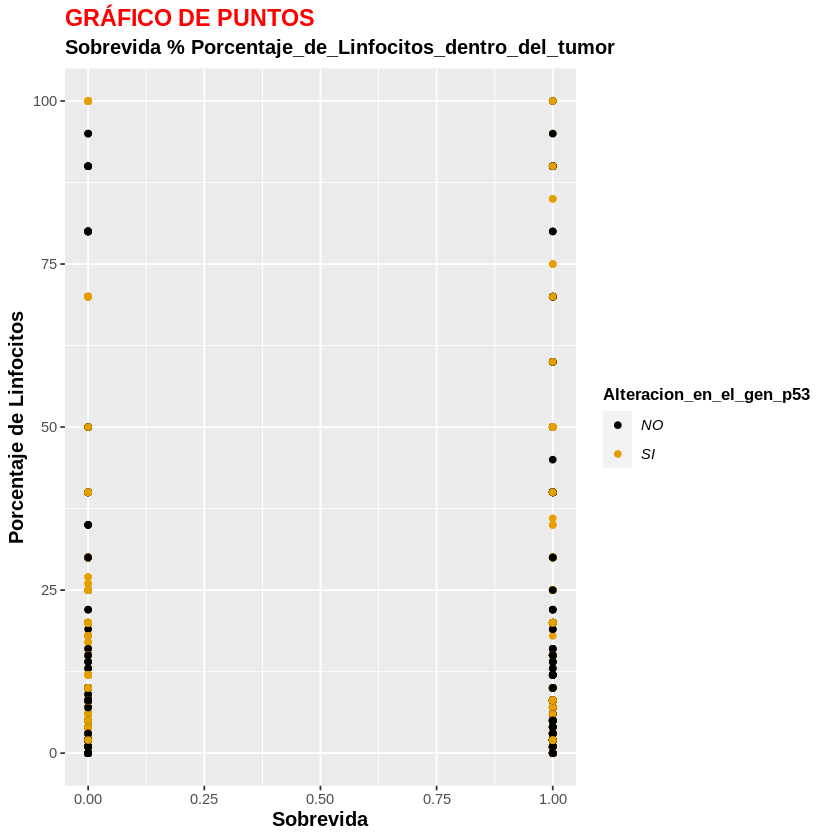

In [ ]:
#Profundizamos en el impacto de la variable de sobrevida en años en relación 
#con la presencia de linfocitos en el tumor y la alteración en el gen p53

#Más o menos cantidad de linfocitos en el tumor, correlaciona el tiempo de
#Sobrevida??

e<-ggplot(train, aes(y=train$Porcentaje_de_Linfocitos_dentro_del_tumor, x=train$Sobrevida, colour=Alteracion_en_el_gen_p53))+
   geom_point()+
   theme_tp+
  labs(title = "GRÁFICO DE PUNTOS",
       subtitle = "Sobrevida % Porcentaje_de_Linfocitos_dentro_del_tumor")+
   labs(y= "Porcentaje de Linfocitos", x = "Sobrevida")+
   scale_colour_colorblind()

suppressWarnings(grid.arrange(e,ncol=1,nrow=1))

¿Qué conclusión llegamos?

Parece que correlaciona con. A mayor cantidad de linfocitos en el tumor, menor es la sobrevida en año. 

(Si el dato es verdadero, estaría bueno probarlo buscando alterar p53 en tumores y ver si se reclutan o no más linfocitos en ese tumor).

In [ ]:
#No parece ser una correlación fuerte

cor(x=train$Sobrevida_en_años,y=train$Porcentaje_de_Linfocitos_dentro_del_tumor,
    use='complete.obs',
    method=c("pearson"))

[1] -0.01364391

## 3.4 GGpairs por Género

Con estas variables ya seleccionadas, profundizamos nuestro análisis haciendo un gráfico de GGpairs, para ver la corrlación entre estas variables cuando realizamos la Apertura de las mismas por el genero

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


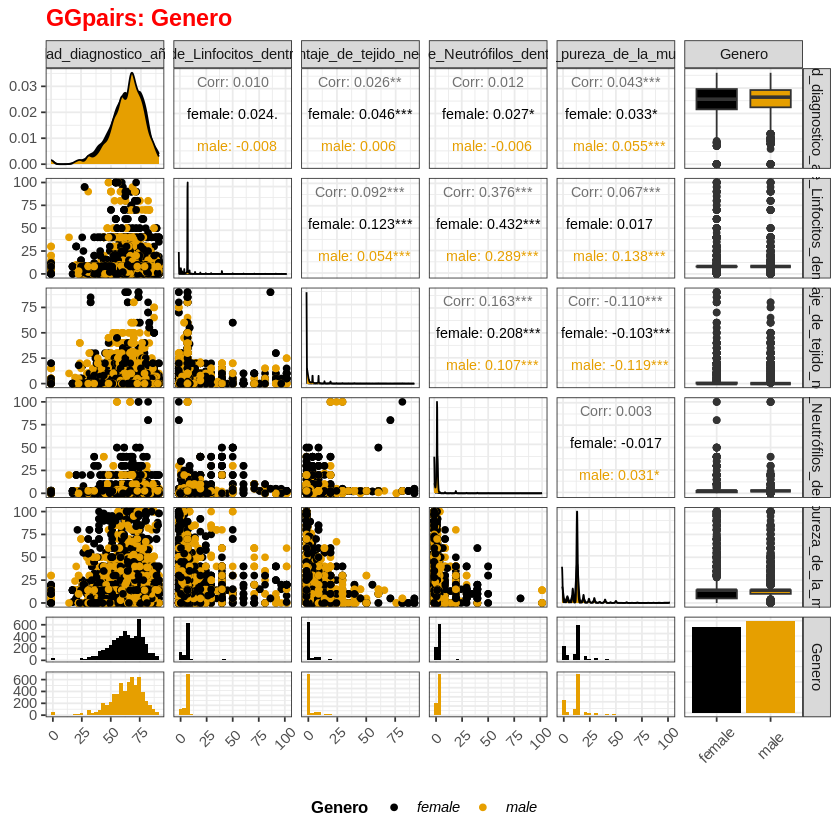

In [ ]:
#Realizo un gráfico ggpairs para estudiar las variables numéricas abriéndolo por el tipo de género y por la variable a predecir

#POR GENERO
##Eli, se puede hacer con todas la variables, pero queda medio imposible de leer. Yo sacaría las que están mas correlacionadas y me quedo con

train %>% 
  select(vn_seleccion,Genero) %>% # 
  mutate(Genero = factor(Genero)) %>%  #Quiero que el factor sea por genero
  ggpairs(., mapping = aes(colour = Genero), title = "GGpairs: Genero",
          upper = list(continuous = wrap("cor", size = 3, hjust=0.5)), 
          legend = 25) + 
  theme_bw() +
  theme_tp+
  theme(axis.text.x = element_text(angle=45, vjust=0.5),
        legend.position = "bottom")+
   scale_fill_colorblind()+
   scale_colour_colorblind()

A partir del gráfico de GGpairs, hay algunas diferencias en las distribuciones cuando se separan las variables de acuerdo al género. 

Entre las esperadas, se encuentra la altura y el peso. En donde el peso en promedio es mayor para los hombres que las mujeres y de igual forma la altura.

Por otro lado, es llamativo la diferencia entre las edades de diagnóstico y el género por un lado, y la presencia de neutrófilos donde también parece haber alguna diferencia en la distribución relacionada con el género.

Para visualizar mejor esto, vamos estuidar estas relaciones con gráficos de barras particulares.

# 4.Modelo Lasso

https://eea-uba.github.io/EEA-2022/clase%2010/regularizacion.html#Gr%C3%A1ficos_de_an%C3%A1lisis

In [ ]:
#Columnas a utilizar
columnas<-c(#"Indice_de_masa_corporal",
            "Sobrevida",
            "Altura",
            "Peso",
            "Edad_diagnostico_años", #Desde la fecha que se hace el diagnóstico.
            "Grupo_cultural",
            "Genero",
            "Características_morfologicas", #Le saco raza, porque no me gusta la palabra: ok
            "Diangóstico_Primario",
            "Porcentaje_de_Linfocitos_dentro_del_tumor",
            "Porcentaje_de_tejido_necrótico",
            "Porcentaje_de_Neutrófilos_dentro_del_tumor",
            "Porcentaje_de_pureza_de_la_muestra_obtenida",
            "Alteracion_en_el_gen_p53")

#sobrevida <- train$Sobrevida
laso_data <- train[,columnas]
sobrevida <- laso_data$Sobrevida


La función model.matrix en R no afecta los datos con muchos valores NA. Esta función devuelve una matriz estructurada con los valores de los predictores especificados, excluyendo los valores NA. Sin embargo, hay varias formas de evitar que los datos se reduzcan. Una de ellas es reemplazar los valores NA con algún valor estadísticamente significativo, como la media, la mediana o un valor fijo. Otra opción es eliminar las filas con valores NA, aunque esto puede afectar la precisión del modelo. La última opción es imputar los valores faltantes utilizando algún algoritmo de imputación, como la imputación por regresión o la imputación por vecinos más cercanos.

In [ ]:
# Matriz con los regresores
mtx = model.matrix(Sobrevida~., data = laso_data)
dim(mtx)


[1] 11578   103

In [ ]:
# Modelo Lasso
lasso.mod = glmnet(x = mtx, # Matriz de regresores
                   y = sobrevida, #Vector de la variable a predecir
                   alpha = 1, # Indicador del tipo de regularizacion
                   family ="binomial", #Ojo aca... decir esto en el video... porque hay que correr el lasso para la familia binomial. 
                   standardize = TRUE) # Estandarizo porque las escalas de las
                   #variables son distintas. Entonces me van a sobrevivir 
                   #más aquellas que tienen escalas mas grandes

# aplicamos la función tidy para obtener los coeficientes del modelo                 
lasso_coef = lasso.mod %>% tidy() %>% arrange(step)
lasso_coef 

term,step,estimate,lambda,dev.ratio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1,0.0286770385,0.08002057,-1.573116e-13
(Intercept),2,0.0646035001,0.07291176,3.775386e-03
Edad_diagnostico_años,2,-0.0003890689,0.07291176,3.775386e-03
Diangóstico_PrimarioGlioblastoma,2,-0.0843781224,0.07291176,3.775386e-03
(Intercept),3,0.1903293825,0.06643448,1.016879e-02
Edad_diagnostico_años,3,-0.0022607502,0.06643448,1.016879e-02
Diangóstico_PrimarioGlioblastoma,3,-0.1620706847,0.06643448,1.016879e-02
"Diangóstico_PrimarioSerous cystadenocarcinoma, NOS",3,0.0378060194,0.06643448,1.016879e-02
(Intercept),4,0.3019524033,0.06053262,1.647646e-02


Dado que la distribución de nuesta variable objetivo es binomial, corremos la distribución del modelo para la familia binomial.

Decir que como es binomial empezamos con el binomial

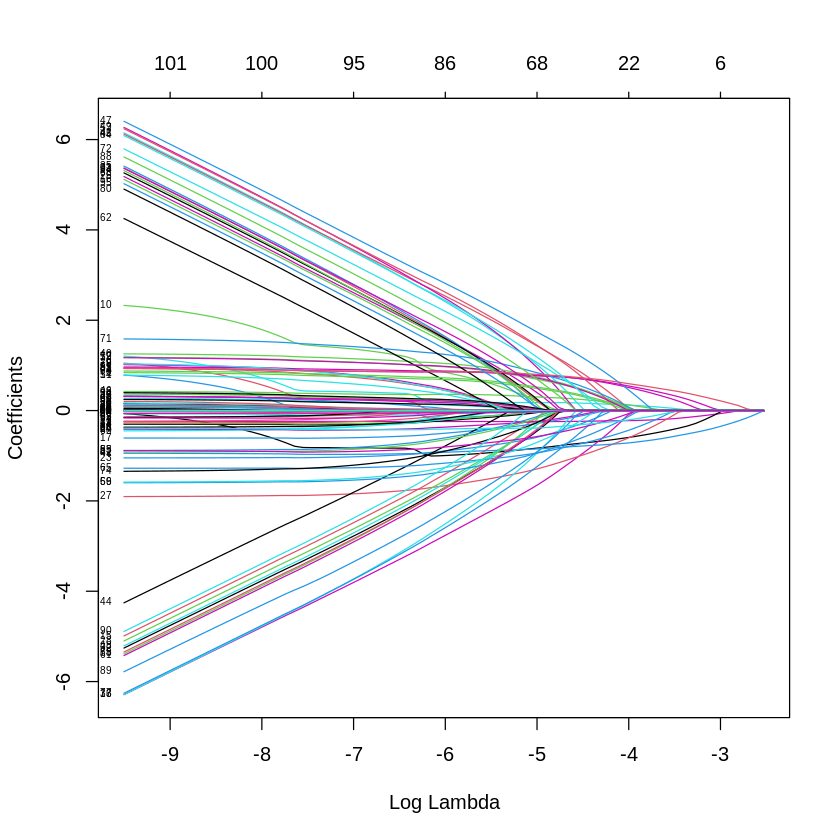

In [ ]:
#QUEDA HERMOSO EL GRAFIQUITO

plot(lasso.mod,xvar = "lambda",label=T) #Ploteo del modelo


## 4.1 Selección de variables

In [ ]:
#Atenti que me da valores de lambda muy chicos, por eso el log(lambda) da negativo en el grafico....

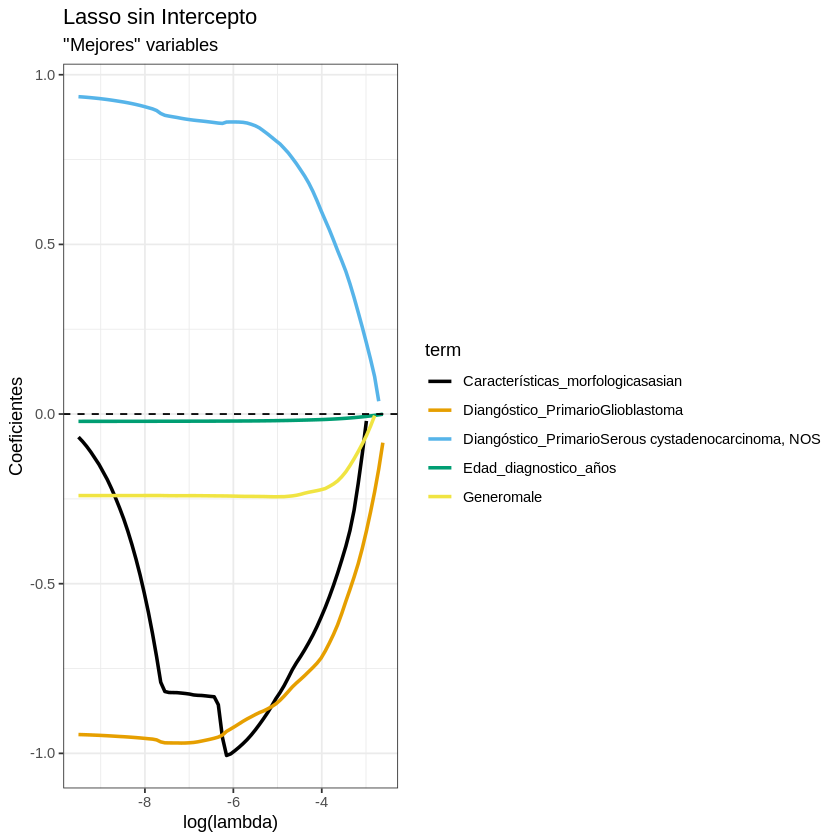

In [ ]:
# Seleccionamos los terminos que sobreviven para valores altos de lambda
terminos_sobrevientes = lasso_coef %>% 
  filter(log(lambda)>-3, term != "(Intercept)") %>%
  select(term) %>% 
  distinct() %>% 
  pull()
# Graficamos
lasso_coef %>% 
  filter(term %in% terminos_sobrevientes) %>% 
  ggplot(., aes(log(lambda), estimate, group=term, color=term)) +
  geom_line(linewidth=1)  +
  scale_colour_colorblind()+
  scale_fill_colorblind()+
  geom_hline(yintercept = 0, linetype='dashed') +
  theme_bw() +
  labs(title="Lasso sin Intercepto", y="Coeficientes", subtitle= "\"Mejores\" variables")

**Observación:**

* El glioblastoma es uno de los tumores más agresivos, y sin ningún tipo de tratamiento actual que permita tratar de forma definitiva la enfermedad. 

* De igual forma, un cáncer de ovario avanzando como lo es "Serous cystadenocarcinoma", representan una enfermadad sin cura. 

En sendos casos, la terapia se enfoca en prolongar la sobrevida y mitigar los efectos de la enfermedad y los tratamientos. Para estos diagnósticos, la sobrevida más allá del año es muy baja.


De forma no supervisada, el modelo está marcando estas variables como importantes para modelar nuestra variable objetivo. 

Es un hallazgo muy importante, ya que de alguna forma valida nuestro sistema.

A modo de comparación, se adjuntan 3 gráficos de sobrevida (generados por cbioportal) asociados con el diganóstico de tres tumores:

* Glioblastoma

* Cancer de mama

* Cáncer de ovario (del tipo serous cystadenocarcinoma)

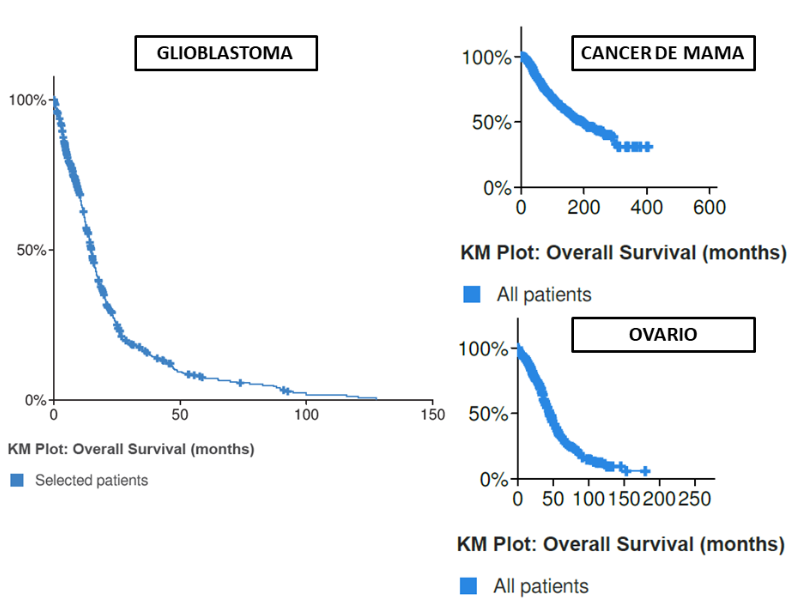

* Se observa claramente que para el caso de glioblastoma, la sobrevida disminute marcadamente y llega el 0% antes de los 150 meses.

* En contraposición la sobrevida en el cancer de mama (en forma global de todos los tipos) supera al 40% aún a los 400 meses post diagnóstico

###Nuevas variables lasso

En base a estos resultados de Lasso, podemos proponer también las siguiente nuevas variables

In [ ]:
#Diagnóstico Primario Agrupado - Variables relevantes

#Reemplazo en train Diagnostico Primario agrupado
for(i in 1:nrow(train)) {
  if (train[i, 'Diangóstico_Primario'] == 'Serous cystadenocarcinoma, NOS') {train[i, 'Diagnóstico_Grouped'] ='Serious_cystadenocarcinoma'}
  else {if (train[i, 'Diangóstico_Primario'] == 'Glioblastoma') {train[i, 'Diagnóstico_Grouped'] ='Glioblastoma'}  
  else{train[i, 'Diagnóstico_Grouped'] ='Other'}}
}

#Reemplazo en test Diagnostico Primario agrupado
for(i in 1:nrow(test)) {
  if (test[i, 'Diangóstico_Primario'] == 'Serous cystadenocarcinoma, NOS') {test[i, 'Diagnóstico_Grouped'] ='Serious_cystadenocarcinoma'}
  else {if (test[i, 'Diangóstico_Primario'] == 'Glioblastoma') {test[i, 'Diagnóstico_Grouped'] ='Glioblastoma'}  
  else{test[i, 'Diagnóstico_Grouped'] ='Other'}}
}

In [ ]:
#ASIATICO
#Reemplazo en train Asiatico
for(i in 1:nrow(train)) {
  if (train[i, 'Características_morfologicas'] == 'asian') {
      train[i, 'Asiatico'] ='SI'
  } else{train[i, 'Asiatico'] ='NO'}
}

#Reemplazo en test Asiatico
for(i in 1:nrow(test)) {
  if (test[i, 'Características_morfologicas'] == 'asian') {
      test[i, 'Asiatico'] ='SI'
  } else{test[i, 'Asiatico'] ='NO'}
}


In [ ]:
#Chequeo
train %>% 
  group_by(Asiatico) %>% 
  summarise(numero_casos=n()) %>%
  mutate(prop = round(prop.table(numero_casos)*100,2))%>%
  arrange(prop)

Asiatico,numero_casos,prop
<chr>,<int>,<dbl>
SI,437,3.77
NO,11141,96.23


**Observación:**  Como la proporción de individuos asiáticos es muy poca en le muestra, menos al 5%. Los efectos observados para esta categoría pueden estar sesgados.

**Agrupo las variables de diagnóstico generadas, en relación a las observaciones del modelo lasso**

In [ ]:
#Chequeo
train %>% 
  group_by(Diagnóstico_Grouped) %>% 
  summarise(numero_casos=n()) %>%
  mutate(prop = round(prop.table(numero_casos)*100,2))%>%
  arrange(prop)


Diagnóstico_Grouped,numero_casos,prop
<chr>,<int>,<dbl>
Serious_cystadenocarcinoma,898,7.76
Glioblastoma,1558,13.46
Other,9122,78.79


In [ ]:
#Realizo lo mismo para el conjunto de test (Para poder realizar a posterior las metricas)
#Chequeo
test %>% 
  group_by(Diagnóstico_Grouped) %>% 
  summarise(numero_casos=n()) %>%
  mutate(prop = round(prop.table(numero_casos)*100,2))%>%
  arrange(prop)


Diagnóstico_Grouped,numero_casos,prop
<chr>,<int>,<dbl>
Serious_cystadenocarcinoma,394,7.94
Glioblastoma,648,13.06
Other,3920,79.00


## 4.2 Selección lambda optimo

In [ ]:
lasso_cv = cv.glmnet(x = mtx, 
                     y = sobrevida, 
                     alpha = 1, 
                     family = "binomial",
                     standardize = T)
summary(lasso_cv)

           Length Class  Mode     
lambda     76     -none- numeric  
cvm        76     -none- numeric  
cvsd       76     -none- numeric  
cvup       76     -none- numeric  
cvlo       76     -none- numeric  
nzero      76     -none- numeric  
call        6     -none- call     
name        1     -none- character
glmnet.fit 13     lognet list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  
index       2     -none- numeric  

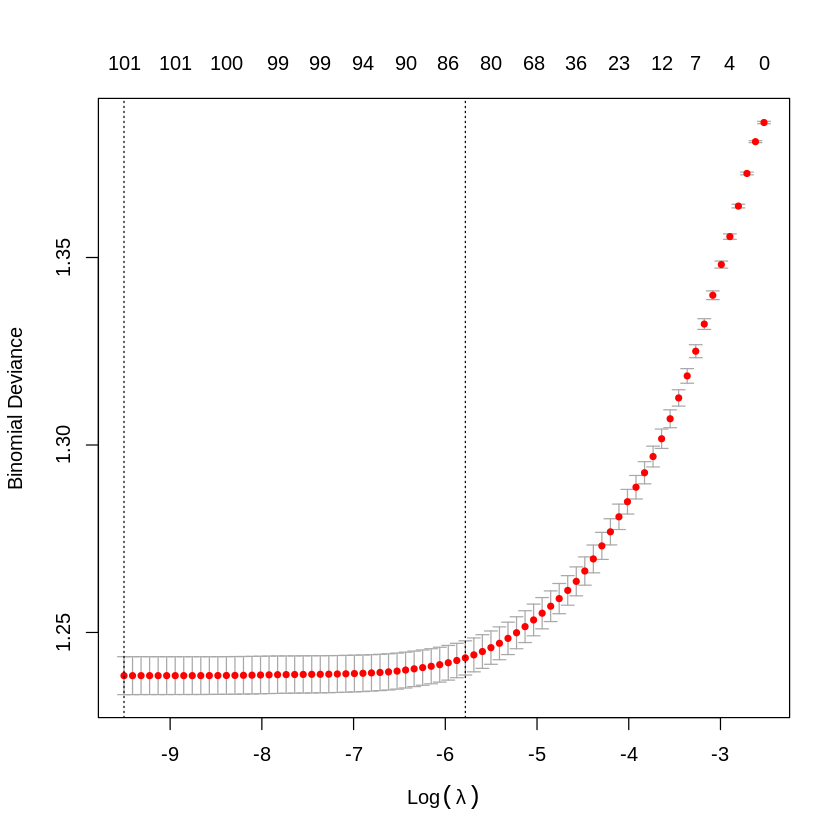

In [ ]:
#Grafico BASE

plot(lasso_cv)

In [ ]:
# Información de CV en dataframe con tidy
lasso_cv %>% tidy()


lambda,estimate,std.error,conf.low,conf.high,nzero
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.080020566,1.386004,0.0003171193,1.385687,1.386322,0
0.072911759,1.380899,0.0002643414,1.380634,1.381163,2
0.066434479,1.372422,0.0003669842,1.372055,1.372789,3
0.060532623,1.363722,0.0004936269,1.363228,1.364215,4
0.055155072,1.355583,0.0007223044,1.354860,1.356305,4
0.050255247,1.348121,0.0009423250,1.347179,1.349063,5
0.045790710,1.339933,0.0011643842,1.338769,1.341097,6
0.041722789,1.332254,0.0014348401,1.330819,1.333688,6
0.038016252,1.325012,0.0017356180,1.323276,1.326747,7


In [ ]:
# Lambda minimo y lambda a 1 desvio estandar
lasso_cv %>% glance()

lambda.min,lambda.1se,nobs
<dbl>,<dbl>,<int>
7.462745e-05,0.003083615,11578


In [ ]:
# Selección lambda óptimo
lasso_lambda_opt = lasso_cv$lambda.min
# Entrenamiento modelo óptimo
lasso_opt = glmnet(x = mtx, # Matriz de regresores
                   y = sobrevida, # Vector de la variable a predecir
                   alpha = 1, # Indicador del tipo de regularizacion
                   family = "binomial",
                   standardize = TRUE, # Estandarizamos
                   lambda = lasso_lambda_opt)
# Salida estandar
lasso_opt


Call:  glmnet(x = mtx, y = sobrevida, family = "binomial", alpha = 1,      lambda = lasso_lambda_opt, standardize = TRUE) 

   Df  %Dev    Lambda
1 100 11.64 7.463e-05

In [ ]:
# Tidy
lasso_opt %>% tidy()

term,step,estimate,lambda,dev.ratio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1,0.482992936,7.462745e-05,0.1164208
Altura,1,-0.001536857,7.462745e-05,0.1164208
Peso,1,0.001388205,7.462745e-05,0.1164208
Edad_diagnostico_años,1,-0.021494665,7.462745e-05,0.1164208
Grupo_culturalnot hispanic or latino,1,0.081023862,7.462745e-05,0.1164208
Grupo_culturalnot reported,1,0.273142055,7.462745e-05,0.1164208
Generomale,1,-0.240490112,7.462745e-05,0.1164208
Características_morfologicasasian,1,-0.055653596,7.462745e-05,0.1164208
Características_morfologicasblack or african american,1,1.061741976,7.462745e-05,0.1164208


In [ ]:
# Glance
lasso_opt %>% glance()

nulldev,npasses,nobs
<dbl>,<int>,<int>
16048.14,296,11578


# 5.Modelos de regresión logística

In [ ]:
#Varios modelos

# Creación de fórmulas
logit_formulas <- formulas(.response = ~ Sobrevida,
                           Diagnostico = ~ Diagnóstico_Grouped,
                           Asia = ~ Asiatico,
                           Edad = ~ Edad_diagnostico_años,
                           Sexo = ~ Genero,  
                           Neutrofilos = ~ Porcentaje_de_Neutrófilos_dentro_del_tumor,
                           Linfocitos = ~ Porcentaje_de_Linfocitos_dentro_del_tumor,
                           Necrosis = ~ Porcentaje_de_tejido_necrótico,
                           p53 = ~ Alteracion_en_el_gen_p53,
                           Pureza = ~ Porcentaje_de_pureza_de_la_muestra_obtenida,
                           
                           #Modelos que propondría y evaluaría: Variables Lasso + Interacciones encontradas -> referencia estadistica... (perfecto)
                           Lasso = ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + Genero,
                           Lasso_excAsia = ~ Diagnóstico_Grouped + Edad_diagnostico_años + Genero,
                           Lasso_P3Linf = ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + Genero + Porcentaje_de_Linfocitos_dentro_del_tumor*Alteracion_en_el_gen_p53,
                           Lasso_P3Edad = ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + Genero + Edad_diagnostico_años*Alteracion_en_el_gen_p53,
                           Lasso_P3Linf = ~ Diagnóstico_Grouped + Edad_diagnostico_años + Genero + Porcentaje_de_Linfocitos_dentro_del_tumor*Alteracion_en_el_gen_p53,
                           Lasso_P3Edad_excAsia = ~ Diagnóstico_Grouped + Edad_diagnostico_años + Genero + Edad_diagnostico_años*Alteracion_en_el_gen_p53,
                          
                                                     
                           #Modelos con conocimiento de campo
                           Modelo_1 = ~ Porcentaje_de_Neutrófilos_dentro_del_tumor + Porcentaje_de_Linfocitos_dentro_del_tumor, # modelo con las variables inmunes
                           Modelo_2 = ~ Porcentaje_de_tejido_necrótico + Porcentaje_de_Neutrófilos_dentro_del_tumor, # modelo Neutrofilos y daño en el tumor
                           Modelo_3 = ~ Porcentaje_de_tejido_necrótico + Porcentaje_de_Linfocitos_dentro_del_tumor,  # modelo Linfocitos y daño en el tumor
                           )
logit_formulas # observamos el objeto formulas

$Diagnostico
Sobrevida ~ Diagnóstico_Grouped

$Asia
Sobrevida ~ Asiatico

$Edad
Sobrevida ~ Edad_diagnostico_años

$Sexo
Sobrevida ~ Genero

$Neutrofilos
Sobrevida ~ Porcentaje_de_Neutrófilos_dentro_del_tumor

$Linfocitos
Sobrevida ~ Porcentaje_de_Linfocitos_dentro_del_tumor

$Necrosis
Sobrevida ~ Porcentaje_de_tejido_necrótico

$p53
Sobrevida ~ Alteracion_en_el_gen_p53

$Pureza
Sobrevida ~ Porcentaje_de_pureza_de_la_muestra_obtenida

$Lasso
Sobrevida ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + 
    Genero

$Lasso_excAsia
Sobrevida ~ Diagnóstico_Grouped + Edad_diagnostico_años + Genero

$Lasso_P3Linf
Sobrevida ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + 
    Genero + Porcentaje_de_Linfocitos_dentro_del_tumor * Alteracion_en_el_gen_p53

$Lasso_P3Edad
Sobrevida ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + 
    Genero + Edad_diagnostico_años * Alteracion_en_el_gen_p53

$Lasso_P3Linf
Sobrevida ~ Diagnóstico_Grouped + Edad_diagnostico_años + Gener

Relaciones detras de cada modelo:

**Modelos estadísticos**

* **Lasso** = Contiene las variables lasso seleccionadas (Edad al diagnóstico, Diagnóstico primario agrupado, Asiatico, Genéro)

* **Lasso_excAsia** = Contiene las variables lasso seleccionadas (- Asiaticos) 

* **Lasso_P3Linf** = Contiene las variables lasso seleccionadas + interacción entre linfocitos y p53.

* **Lasso_P3Edad** = Contiene las variables lasso seleccionadas + interacción entre edad del diagnósitico y p53.

* **Lasso_P3Linf_excAsia** = Contiene las variables lasso (- Asiaticos) seleccionadas + interacción entre linfocitos y p53

* **Lasso_P3Edad_excAsia** = Contiene las variables lasso (- Asiaticos) seleccionadas + interacción entre edad de diagnóstico y p53
                          

**Modelos con conocimiento de campo**


* **Modelo 1**: Modelo con células inmunes (neutrofilos y linfocitos) dentro del tumor

* **Modelo 2**: Modelo con daño en el tumor asociado a los neutrófilos

* **Modelo 3**: Modelo con daño en el tumor asociado a los linfocitos



In [ ]:
#No puedo creer como hiciste para solucinarlo. EL tiempo que perdí en este punto

models <- data_frame(logit_formulas) %>%  # dataframe a partir del objeto formulas
  mutate(models = names(logit_formulas), # columna con los nombres de las formulas
         expression = paste(logit_formulas), # columna con las expresiones de las formulas
         mod = map(logit_formulas, ~glm(., family = 'binomial', data = train))) 



Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
ℹ Please use `tibble()` instead.”


In [ ]:
print(models)

# A tibble: 18 × 4
   logit_formulas models               expression                          mod  
   <named list>   <chr>                <chr>                               <nam>
 1 <formula>      Diagnostico          Sobrevida ~ Diagnóstico_Grouped     <glm>
 2 <formula>      Asia                 Sobrevida ~ Asiatico                <glm>
 3 <formula>      Edad                 Sobrevida ~ Edad_diagnostico_años   <glm>
 4 <formula>      Sexo                 Sobrevida ~ Genero                  <glm>
 5 <formula>      Neutrofilos          Sobrevida ~ Porcentaje_de_Neutrófi… <glm>
 6 <formula>      Linfocitos           Sobrevida ~ Porcentaje_de_Linfocit… <glm>
 7 <formula>      Necrosis             Sobrevida ~ Porcentaje_de_tejido_n… <glm>
 8 <formula>      p53                  Sobrevida ~ Alteracion_en_el_gen_p… <glm>
 9 <formula>      Pureza               Sobrevida ~ Porcentaje_de_pureza_d… <glm>
10 <formula>      Lasso                Sobrevida ~ Diagnóstico_Grouped + … <glm>
11 <formu

# 6.Evaluación de modelos

## 6.1 Selección de modelos regresión Logistica ##

In [ ]:
# Calcular las medidas de evaluación para todos los modelos
models <- models %>%  mutate(glance = map(mod,glance))

In [ ]:
# Obtener las medidas de evaluacion de interes
models_eval <- models %>% 
                         unnest(glance) %>%
                         # Calculamos la deviance explicada
                          mutate(perc_explained_dev = 1-deviance/null.deviance) %>% 
                          select(-c(models, df.null, AIC, BIC)) %>% 
                          arrange(deviance)

In [ ]:
print(models_eval) #HAGO UNA MIRADA GENERAL PRIMERO

# A tibble: 18 × 9
   logit_formulas expression  mod   null.…¹ logLik devia…² df.re…³  nobs perc_…⁴
   <named list>   <chr>       <nam>   <dbl>  <dbl>   <dbl>   <int> <int>   <dbl>
 1 <formula>      Sobrevida … <glm>  16048. -7501.  15002.   11569 11578 6.52e-2
 2 <formula>      Sobrevida … <glm>  16048. -7504.  15008.   11570 11578 6.48e-2
 3 <formula>      Sobrevida … <glm>  16048. -7521.  15041.   11572 11578 6.28e-2
 4 <formula>      Sobrevida … <glm>  16048. -7574.  15147.   11570 11578 5.61e-2
 5 <formula>      Sobrevida … <glm>  16048. -7577.  15154.   11571 11578 5.57e-2
 6 <formula>      Sobrevida … <glm>  16048. -7592.  15184.   11573 11578 5.39e-2
 7 <formula>      Sobrevida … <glm>  16048. -7778.  15555.   11575 11578 3.07e-2
 8 <formula>      Sobrevida … <glm>  16048. -7895.  15790.   11576 11578 1.61e-2
 9 <formula>      Sobrevida … <glm>  16048. -7926.  15852.   11576 11578 1.22e-2
10 <formula>      Sobrevida … <glm>  16048. -7966.  15931.   11576 11578 7.27e-3
11 <formu

In [ ]:
print(models_eval$expression) #Aca no se ve la expresión y no llego a ver cual es el mejor modelo :,( #Los imprime en el orden que los arregló-- 
  #TARDÉ 2 HORA EN RESOLVER ESTO JAJAJAJA -> pero genial

 [1] "Sobrevida ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + Genero + Porcentaje_de_Linfocitos_dentro_del_tumor * Alteracion_en_el_gen_p53"
 [2] "Sobrevida ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + Genero + Edad_diagnostico_años * Alteracion_en_el_gen_p53"                    
 [3] "Sobrevida ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + Genero"                                                                       
 [4] "Sobrevida ~ Diagnóstico_Grouped + Edad_diagnostico_años + Genero + Porcentaje_de_Linfocitos_dentro_del_tumor * Alteracion_en_el_gen_p53"           
 [5] "Sobrevida ~ Diagnóstico_Grouped + Edad_diagnostico_años + Genero + Edad_diagnostico_años * Alteracion_en_el_gen_p53"                               
 [6] "Sobrevida ~ Diagnóstico_Grouped + Edad_diagnostico_años + Genero"                                                                                  
 [7] "Sobrevida ~ Diagnóstico_Grouped"                                      

In [ ]:
print(models_eval$deviance) 

 [1] 15002.48 15008.42 15041.04 15147.47 15154.04 15183.83 15555.42 15790.31
 [9] 15851.74 15931.50 15987.92 15990.64 15990.96 16041.95 16042.18 16042.24
[17] 16047.66 16047.81


**Mejor modelo (menor deviance):**

* **Variables Lasso + Interacción P53 y linfocitos**: Modelo de variables lasso junto con interacción de las células linfocitos y alteración en el gen p53.


* *Sobrevida ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + Genero + Porcentaje_de_Linfocitos_dentro_del_tumor * Alteracion_en_el_gen_p53*

**Peor modelo(mayor deviance):**

* **p53**: Presencia de alteraciones en este gen

* *Sobrevida ~ Alteracion_en_el_gen_p53*


**Observacion:**

**Peor modelo:**
La alteración en p53 es una mutación que se produce de forma heterogéna en los tumores. Probablmente no aporte mucha información para el modelo si sólo se considera esta variable. Por eso no da como peor modelo.

**Mejor modelo:**
El modelo Lasso_P3Linf, que incorpora las variables impotantes obtenidas por la regularización y con la interacción de la mutación p53 y la número de linfocitos presentes, resulta un observación novedosa (pero coherente) desde el punto de vista inmunológico.  

In [ ]:
print(models_eval$logit_formulas)

$Lasso_P3Linf
Sobrevida ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + 
    Genero + Porcentaje_de_Linfocitos_dentro_del_tumor * Alteracion_en_el_gen_p53

$Lasso_P3Edad
Sobrevida ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + 
    Genero + Edad_diagnostico_años * Alteracion_en_el_gen_p53

$Lasso
Sobrevida ~ Diagnóstico_Grouped + Asiatico + Edad_diagnostico_años + 
    Genero

$Lasso_P3Linf
Sobrevida ~ Diagnóstico_Grouped + Edad_diagnostico_años + Genero + 
    Porcentaje_de_Linfocitos_dentro_del_tumor * Alteracion_en_el_gen_p53

$Lasso_P3Edad_excAsia
Sobrevida ~ Diagnóstico_Grouped + Edad_diagnostico_años + Genero + 
    Edad_diagnostico_años * Alteracion_en_el_gen_p53

$Lasso_excAsia
Sobrevida ~ Diagnóstico_Grouped + Edad_diagnostico_años + Genero

$Diagnostico
Sobrevida ~ Diagnóstico_Grouped

$Edad
Sobrevida ~ Edad_diagnostico_años

$Sexo
Sobrevida ~ Genero

$Asia
Sobrevida ~ Asiatico

$Modelo_3
Sobrevida ~ Porcentaje_de_tejido_necrótico + Porcentaje_de_Linfoc

In [ ]:
# Añadir las predicciones
models <- models %>% 
  mutate(pred= map(mod, augment, type.predict = "response"))


## 6.2 Comparación entre valores observados y probabilidad de sobrevida  ##

In [ ]:
#Mejor modelo vs Peor modelo
prediction_mejor <- models %>% 
  filter(models=="Lasso_P3Linf") %>% 
  unnest(pred)

#Peor modelo
prediction_peor <- models %>% 
  filter(models=="p53") %>% 
  unnest(pred)

# Modelo sistema inmune
prediction_campo <- models %>% 
  filter(models=="Modelo_3") %>% 
  unnest(pred)

#Modelo Edad
prediction_edad <- models %>% 
  filter(models=="Edad") %>% 
  unnest(pred)

#y_predicted <- predict(, s = best_lambda, newx = x)



**Violin Plot**

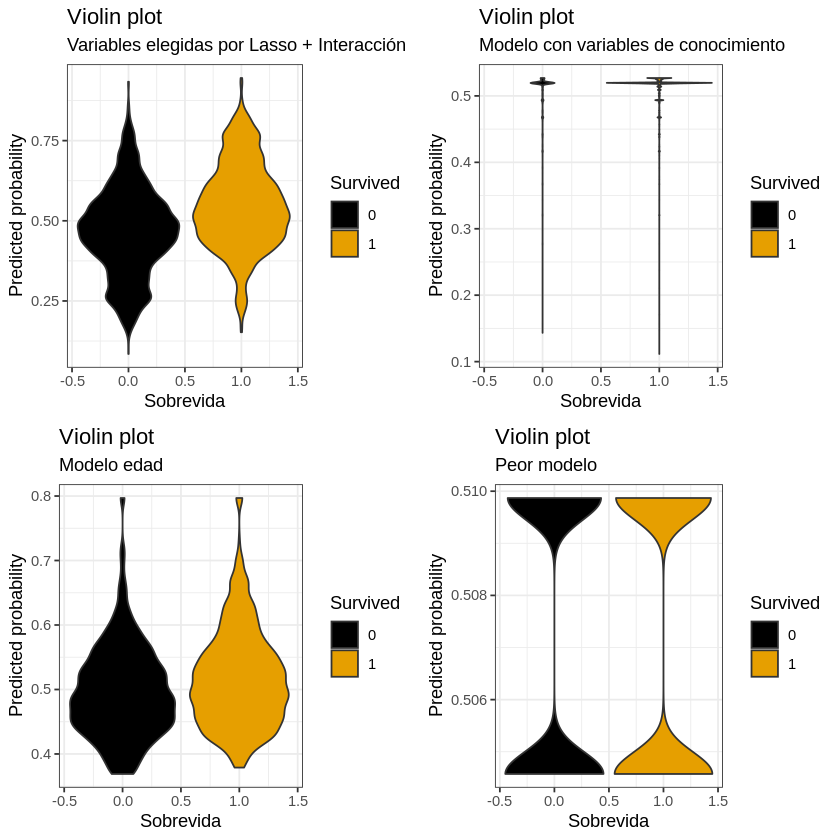

In [ ]:
#Peor vs Mejor #Quedan feo 

# graficamos el modelo completo
violin_mejor = ggplot(prediction_mejor, aes(x=Sobrevida, y=.fitted, group=Sobrevida, fill=factor(Sobrevida))) + 
  geom_violin() +
  theme_bw() +
  scale_fill_colorblind()+
  guides(scale="none", fill=guide_legend(title="Survived"))+
  labs(title='Violin plot', subtitle='Variables elegidas por Lasso + Interacción', y='Predicted probability')

# graficamos el modelo malo
violin_peor = ggplot(prediction_peor, aes(x=Sobrevida, y=.fitted, group=Sobrevida, fill=factor(Sobrevida))) + 
  geom_violin() + 
  theme_bw() +
  scale_fill_colorblind()+
  guides(scale="none", fill=guide_legend(title="Survived"))+
  labs(title='Violin plot', subtitle='Peor modelo', y='Predicted probability')


#Otros modelos

#Modelo Lasso con interaccion
violin_full = ggplot(prediction_campo, aes(x=Sobrevida, y=.fitted, group=Sobrevida, fill=factor(Sobrevida))) + 
  geom_violin() +
  theme_bw() +
  scale_fill_colorblind()+
  guides(scale="none", fill=guide_legend(title="Survived"))+
  labs(title='Violin plot', subtitle='Modelo con variables de conocimiento', y='Predicted probability')

# Modelo Edad
violin_edad = ggplot(prediction_edad, aes(x=Sobrevida, y=.fitted, group=Sobrevida, fill=factor(Sobrevida))) + 
  geom_violin() + 
  theme_bw() +
  scale_fill_colorblind()+
  guides(scale="none", fill=guide_legend(title="Survived"))+
  labs(title='Violin plot', subtitle='Modelo edad', y='Predicted probability')



#mostramos todos (De mejor a peor)
plot_grid(violin_mejor, violin_full, violin_edad, violin_peor)



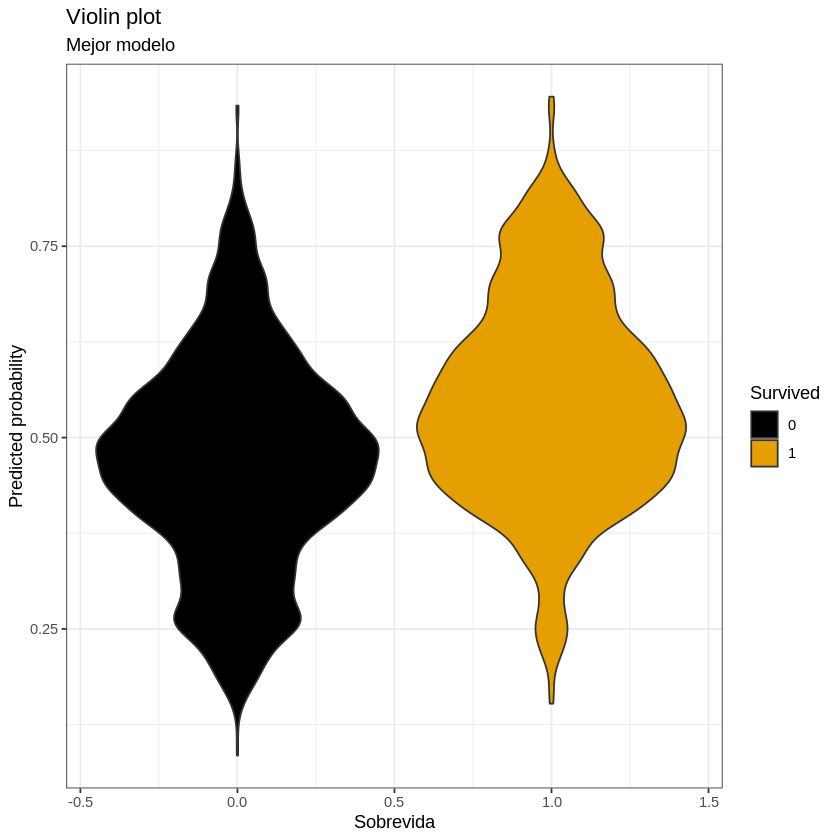

In [ ]:
# graficamos el modelo completo
ggplot(prediction_mejor, aes(x=Sobrevida, y=.fitted, group=Sobrevida, fill=factor(Sobrevida))) + 
  geom_violin() +
  theme_bw() +
  scale_fill_colorblind()+
  guides(scale="none", fill=guide_legend(title="Survived"))+
  labs(title='Violin plot', subtitle='Mejor modelo', y='Predicted probability')

**Gráfico de Hosmer-Lemeshow**

In [ ]:
#Gráfico de Hosmer-Lemeshow

In [ ]:
Hosmer_Lemeshow_plot <- function(dataset, predicted_column, class_column, bins, positive_value, color='forestgreen', nudge_x=0, nudge_y=0.05){
  # Asignar los grupos a las observaciones de acuerdo a la probabilidad predicha
  dataset['group'] <- bin(dataset[predicted_column], nbins = bins, method = 'l', labels=c(1:bins))
  # Contar la cantidad de casos positivos por grupo
  positive_class <- dataset %>% filter(!!sym(class_column)==positive_value) %>% group_by(group) %>% count()
  # Obtener la media de las predicciones por grupo
  HL_df <- dataset %>% group_by(group) %>% summarise(pred=mean(!!sym(predicted_column)), count=n()) %>%
            inner_join(.,positive_class) %>%
            mutate(freq=n/count)
  # Gráfico 
  HM_plot <- ggplot(HL_df, aes(x=pred, y=freq)) + 
    geom_point(aes(size=n), color=color) +
    geom_text(aes(label=n),nudge_y = nudge_y)+
    geom_abline(slope = 1, intercept = 0, linetype='dashed') + 
    theme_bw() +
    labs(title='Hosmer-Lemeshow', size='Casos', x="Probabilidad Predicha", y="Frecuencia observada")
  return(HM_plot)
}

Joining, by = "group"


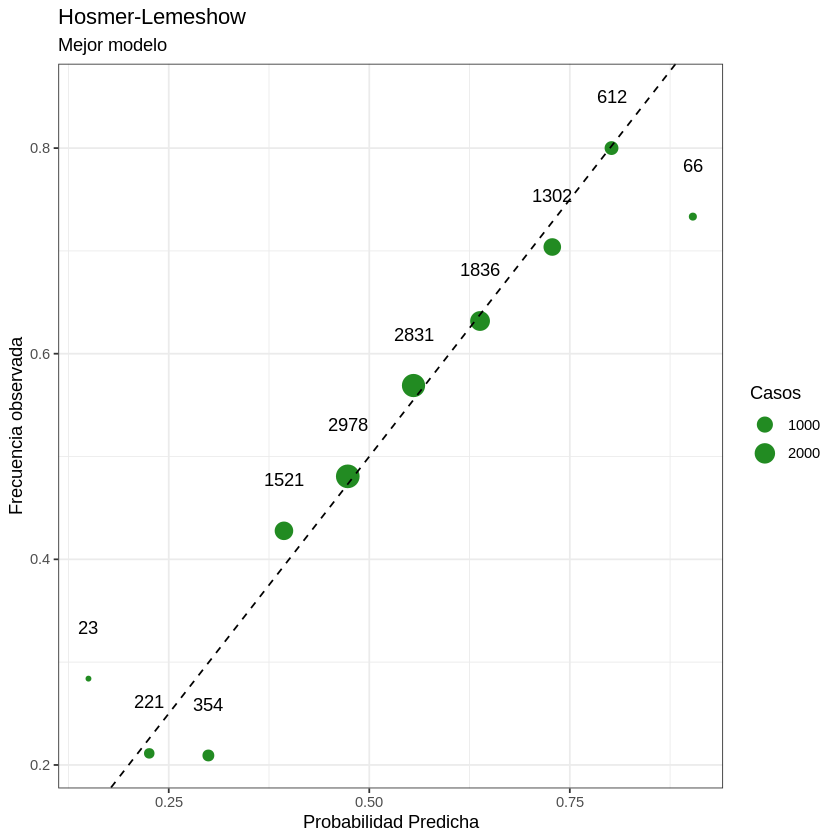

In [ ]:
#Para observar nuestro mejor modelo, con un modelo lasso de interés
# modelo Mejor
Hosmer_Lemeshow_plot(prediction_mejor, '.fitted', 'Sobrevida', 10, 1) +
  labs(subtitle="Mejor modelo")



Joining, by = "group"


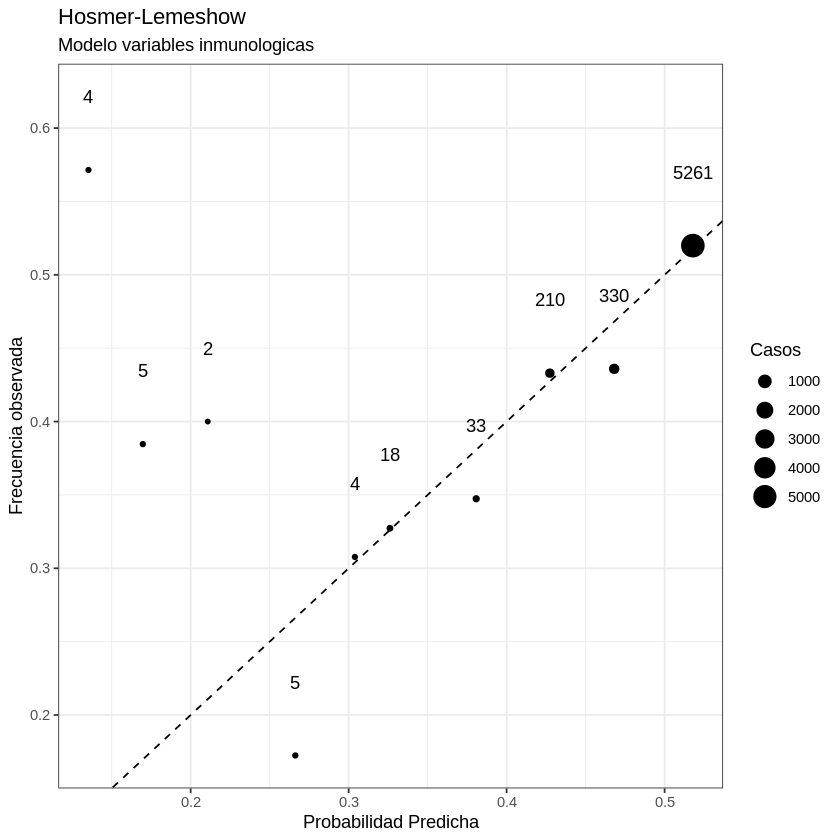

In [ ]:
#Modelo lasso de interés
Hosmer_Lemeshow_plot(prediction_campo, '.fitted', 'Sobrevida', 10, 1,color = "black") +
  labs(subtitle="Modelo variables inmunologicas")

Joining, by = "group"


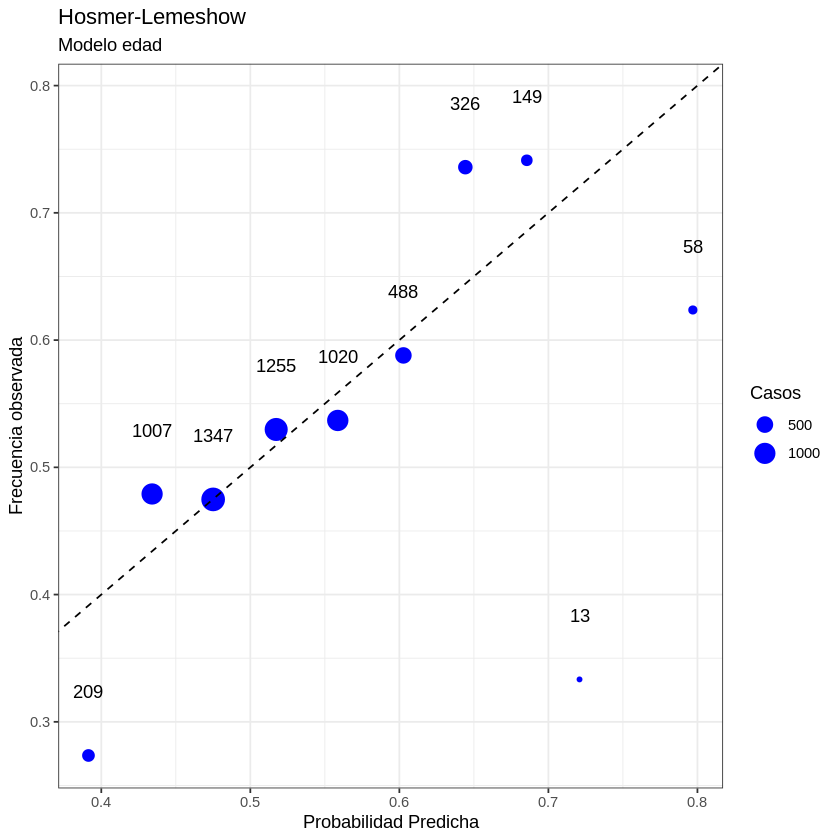

In [ ]:
# modelo edad
Hosmer_Lemeshow_plot(prediction_edad, '.fitted', 'Sobrevida', 10, 1, color = "blue") + labs(subtitle="Modelo edad")

Joining, by = "group"


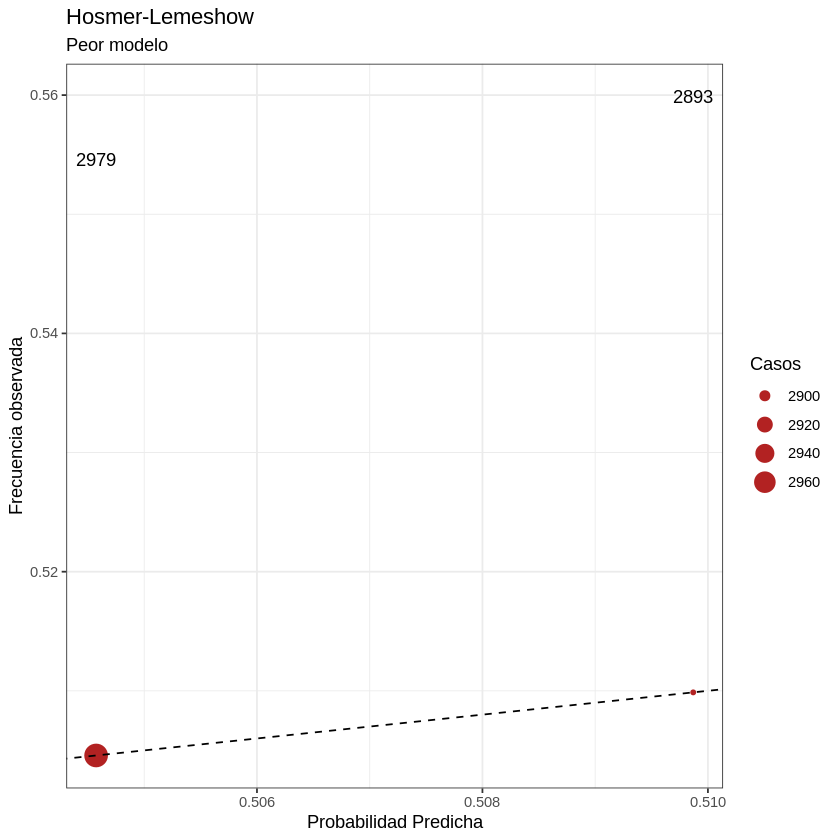

In [ ]:
#Peor modelo
Hosmer_Lemeshow_plot(prediction_peor, '.fitted', 'Sobrevida', 10, 1, color = "firebrick") + labs(subtitle="Peor modelo")


##6.3 Curvas ROC##

In [ ]:
# Calculamos curvas ROC para los modelos en estudio
roc_campo <- roc(response=prediction_campo$Sobrevida, predictor=prediction_campo$.fitted) #Modelo de campo
roc_peor <- roc(response=prediction_peor$Sobrevida, predictor=prediction_peor$.fitted) #El peor modelo
roc_mejor <- roc(response=prediction_mejor$Sobrevida, predictor=prediction_mejor$.fitted) #El mejor
roc_edad <- roc(response=prediction_edad$Sobrevida, predictor=prediction_edad$.fitted) #Modelo edad

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



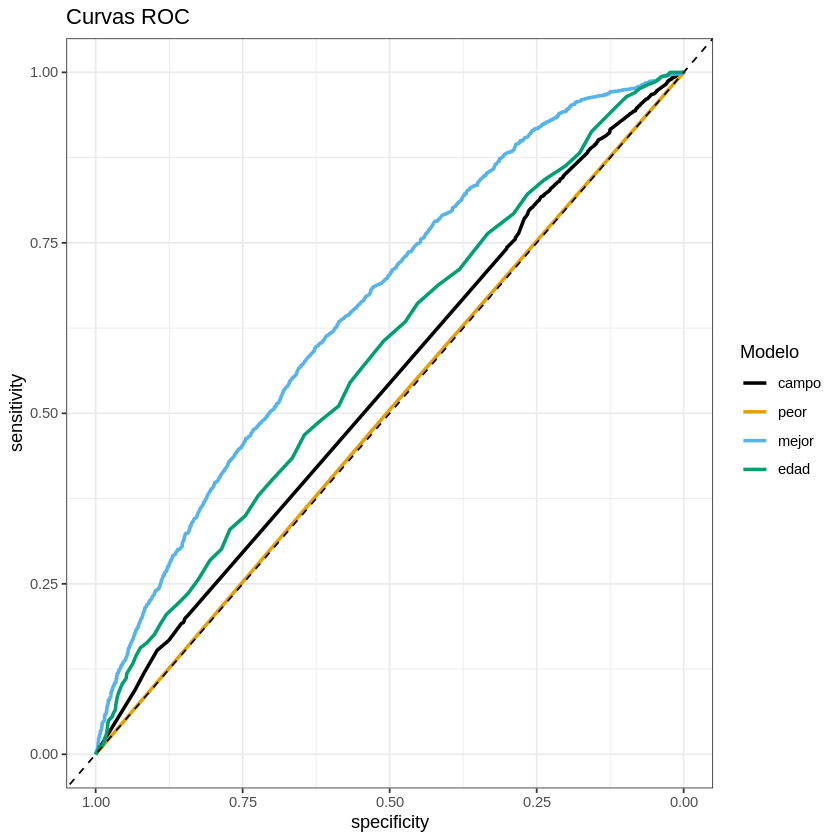

In [ ]:
ggroc(list( campo=roc_campo, peor=roc_peor, mejor=roc_mejor, edad=roc_edad), size=1) + 
  geom_abline(slope = 1, intercept = 1, linetype='dashed') +
  theme_bw() + 
  scale_colour_colorblind()+
  labs(title='Curvas ROC', color='Modelo')

##6.4 Punto de corte##


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


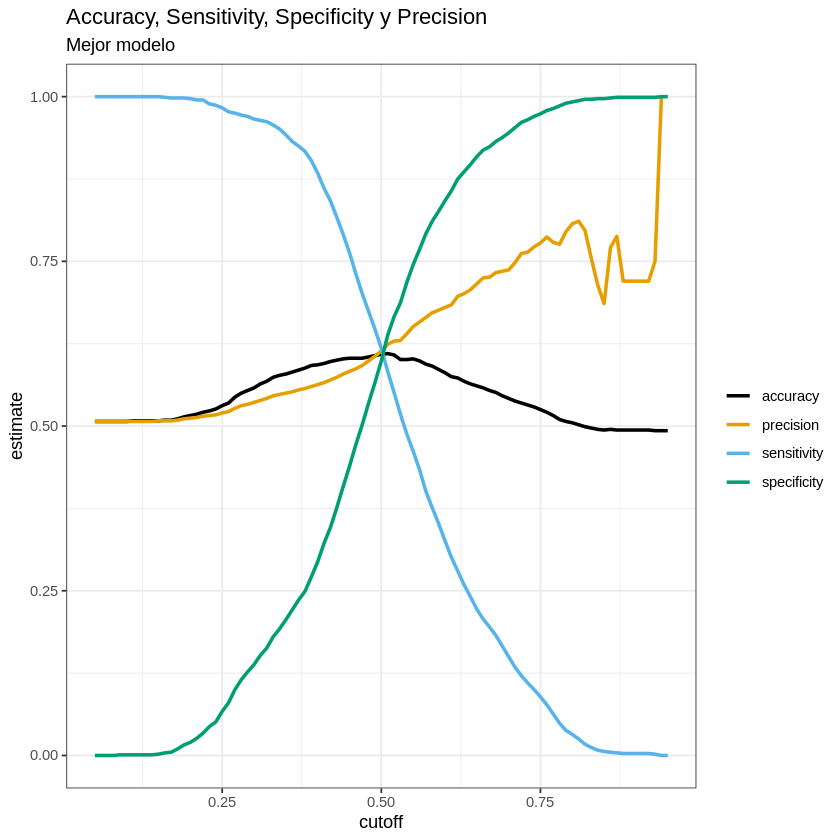

In [ ]:
prediction_metrics <- function(cutoff, predictions=prediction_mejor){
  tab <- predictions %>% 
    mutate(predicted_class = if_else(.fitted > cutoff, 1, 0),
           Sobrevida = factor(Sobrevida))
           u = union(tab$predicted_class,tab$Sobrevida)
  confusionMatrix(table(factor(tab$predicted_class, u), factor(tab$Sobrevida, u)), positive = "1") %>%
    tidy() %>%
    select(term, estimate) %>%
    filter(term %in% c('accuracy', 'sensitivity', 'specificity', 'precision')) %>%
    mutate(cutoff = cutoff)
}

cutoffs = seq(0.05,0.95,0.01)

logit_pred = map_df(cutoffs, prediction_metrics) %>% 
  mutate(term = as.factor(term), estimate = round(estimate, 3))

  


ggplot(logit_pred, aes(cutoff,estimate, group=term, color=term)) + geom_line(size=1) +
  theme_bw() +
  scale_fill_colorblind()+
  scale_colour_colorblind()+
  labs(title= 'Accuracy, Sensitivity, Specificity y Precision', subtitle= 'Mejor modelo', color="")




##6.5 Matriz de confusión##

In [ ]:
#Matriz de confusión en Train

sel_cutoff = 0.4

# Creamos el modelo
full_model <- glm(logit_formulas$Lasso_P3Linf, family = 'binomial', data = train)

# calculamos las predicciones sobre el dataset de train
table_train = augment(x = full_model, type.predict='response')

# Clasificamos utilizamos el punto de corte
table_train = table_train %>% 
  mutate(predicted_class = if_else(.fitted>sel_cutoff, 1, 0) %>% as.factor(), 
         Sobrevida = factor(Sobrevida))

# Creamos la matriz de confusión
confusionMatrix(table(table_train$predicted_class, table_train$Sobrevida), positive = "1")

Confusion Matrix and Statistics

   
       0    1
  0 1764  648
  1 3942 5224
                                          
               Accuracy : 0.6036          
                 95% CI : (0.5946, 0.6125)
    No Information Rate : 0.5072          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2004          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8896          
            Specificity : 0.3091          
         Pos Pred Value : 0.5699          
         Neg Pred Value : 0.7313          
             Prevalence : 0.5072          
         Detection Rate : 0.4512          
   Detection Prevalence : 0.7917          
      Balanced Accuracy : 0.5994          
                                          
       'Positive' Class : 1               
                                          

In [ ]:
#Matriz de confusión en test

# Agregamos la predicciones al dataset de testeo
table_test = augment(x = full_model, newdata=test, type.predict='response') 

# Clasificamos utilizamos el punto de corte
table_test = table_test %>% 
  mutate(predicted_class = if_else(.fitted>sel_cutoff, 1, 0) %>% as.factor(), 
         Sobrevida = factor(Sobrevida))
# Creamos la matriz de confusión
confusionMatrix(table(table_test$predicted_class, table_test$Sobrevida), positive = "1")

Confusion Matrix and Statistics

   
       0    1
  0  724  296
  1 1692 2250
                                         
               Accuracy : 0.5994         
                 95% CI : (0.5856, 0.613)
    No Information Rate : 0.5131         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.1862         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.8837         
            Specificity : 0.2997         
         Pos Pred Value : 0.5708         
         Neg Pred Value : 0.7098         
             Prevalence : 0.5131         
         Detection Rate : 0.4534         
   Detection Prevalence : 0.7944         
      Balanced Accuracy : 0.5917         
                                         
       'Positive' Class : 1              
                                         

# 7.Conclusiones

**Variables**

La base de datos generada, resultó muy heterogénea, por lo tanto,  muchas de las variables presentaban una extensa cantidad de datos faltantes.

La inputación de los datos faltantes, fue un requisito necesario para poder aplicar muchos de los modelos.

De acuerdo al tipo de variables, y la distribución de los datos presentes en cada variable se tomaron diferentes decisiones para su inputación. 


**Hallazagos**

Encontramos dos observaciones novedosas desde el punto de vista inmunológico. 

**1- Por una lado, durante el análisis exploratorio de los datos encontramos que:**

La presencia de alteraciones en el gen p53 se asocian con:

* Mayor edad. Puede ser un indicio de que a mayor edad, mayor es la propababilidad de padecer cáncer por tener esta mutación.

* Más cantidad de linfocitos infiltrantes. Puede implicar que la alteración en el gen p53 condiciona la respuesta inmune celular.

**2- El mejor modelo obtenido, contaba con la interacción de la presencia de linfocitos y la alteración en el gen p53.**


Por otro lado, el modelo de regularización puso de manifiesto (de forma no supervisada), la importancia de las variables de Glioblastoma y de un tipo de cáncer de Ovario (Cystadenocarcinoma) cuyas proognosis son poco favorables. De esta forma, un diagnóstico con esta tipo de tumores se asociaría con un baja probabilidad de sobrevida en el tiempo.
La importancia relativa que tuvieron estas variables, validó la implementación de los datos en el modelo de regularización.

**Coherencia del modelo**

Finalmente podemos destacar la coherencia del análisis ya que los variables seleccionadas mediante el método lasso, resultaron importantes también para la construcción de distintos modelos dentro de la regresión logística.


Esperamos poder profundizar sobre algunos de las observaciones realizadas en este trabajo práctico